## Purpose of this notebook

Summary up to this point:
We have extracted variables for patient demographics, services, procedures, lab tests and diagnosis. In this notebook we will perform exploratory data analysis.

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import the compiled datagrame
combined_df = pd.read_csv('../../data/processed/processed_for_eda.csv')

In [191]:
list_of_cols = combined_df.columns.tolist()
print(len(list_of_cols))
print(list_of_cols[0:10])

388
['Unnamed: 0', 'HADM_ID', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'OUTPUT_LABEL']


In [192]:
combined_df.drop('Unnamed: 0', axis=1, inplace=True)

In [193]:
# first lets calculate the prevalence of readmissions
counts = combined_df.groupby('OUTPUT_LABEL')['HADM_ID'].count().values
prevalence = counts[1]/(counts[0]+counts[1])
print("The prevalence of 30-day readmissions is ", prevalence)
print("The absolute number of readmitted patients is ", counts[1])

The prevalence of 30-day readmissions is  0.06069501745477626
The absolute number of readmitted patients is  2295


In [576]:
# define a function for easy plotting
def plot_summary(column):
    """cross tabulate a descriptive variable column and the output label. 
    Plot the fraction with the positive label and total count."""
    sum_df = pd.crosstab(combined_df[column], combined_df.OUTPUT_LABEL)
    sum_df['count'] = sum_df[0.0]+sum_df[1.0]
    sum_df['pos_fraction'] = sum_df[1.0]/sum_df['count']
        
    ax1=sum_df.plot.bar(y=['pos_fraction'], color='cornflowerblue')
    title1 = 'Fraction of of each '+column+' category with label 1'
    ax1.set_title(title1)
    ax1.legend().set_visible(False)
    ax1.axhline(prevalence, ls='--', c='k')
    ax1.annotate('prevalence', (0,prevalence+0.005))

    ax2=sum_df.plot.bar(y=['count'], color='tomato')
    title2='Total number of admissions in each of the '+column+' category'
    ax2.set_title(title2)
    ax2.legend().set_visible(False)
    ax2.axhline(counts[1], ls='--', c='k')
    ax2.annotate('label 1 total', (0,counts[1]+500))
    plt.show()

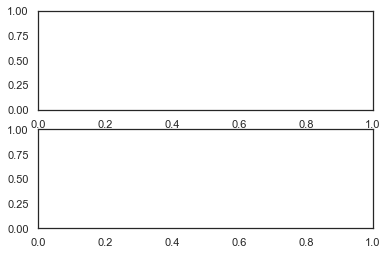

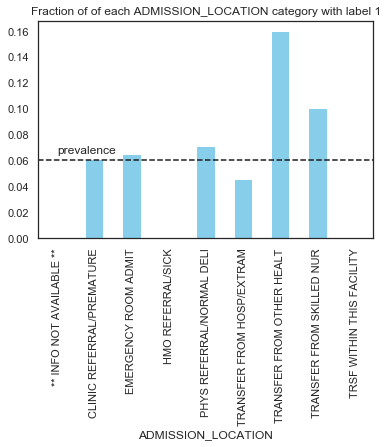

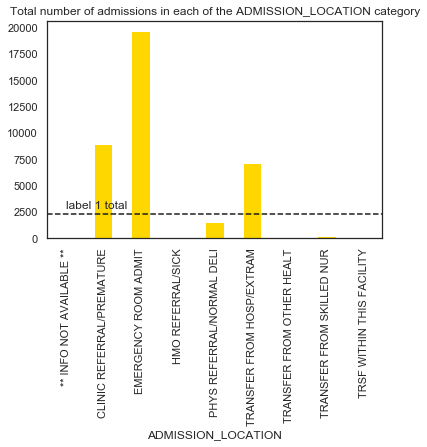

In [312]:
plot_summary('ADMISSION_LOCATION')

#### Readmission with label 1 comprise ~ 6 % if the total dataset. The only categories significantly different from 6% are 'Transfer from other helth' and 'Transfer from skilled nur', which indicates that the patients are more sick. However, since the total counts for the category are so low, it is difficult to assess importance.

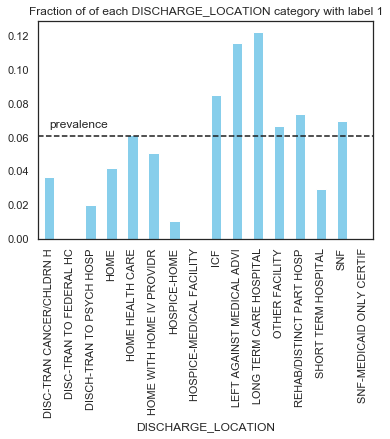

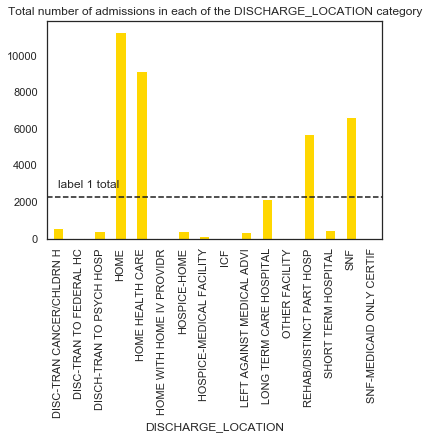

In [263]:
plot_summary('DISCHARGE_LOCATION')

#### 'Left against medical advice' and 'long term care hospital' have unusually high fractions of positive label. This might be important.

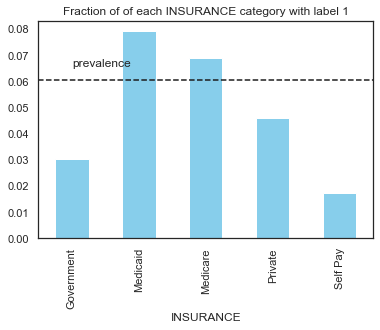

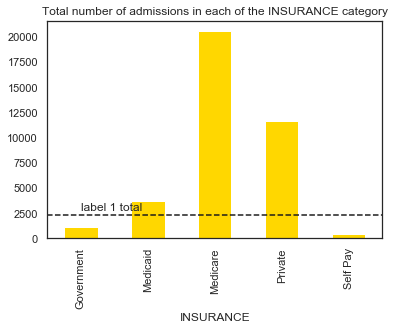

In [264]:
plot_summary('INSURANCE')

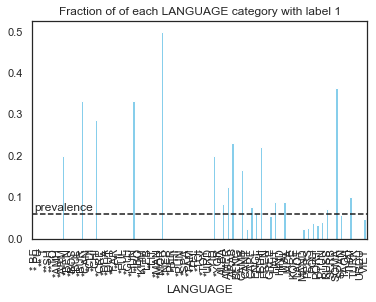

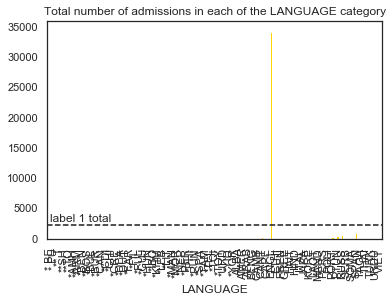

In [265]:
plot_summary('LANGUAGE')

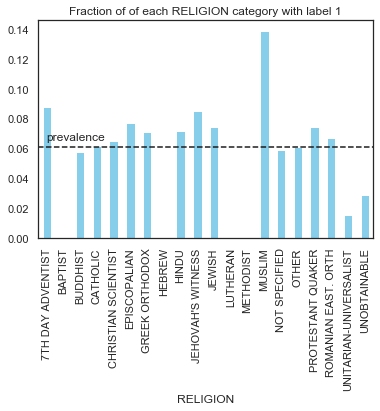

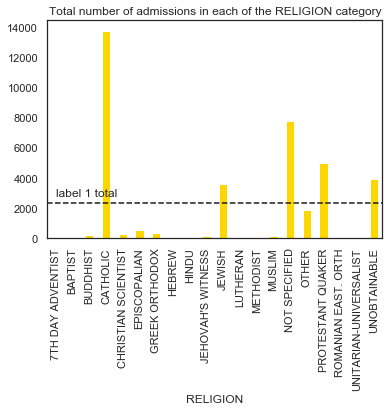

In [266]:
plot_summary('RELIGION')

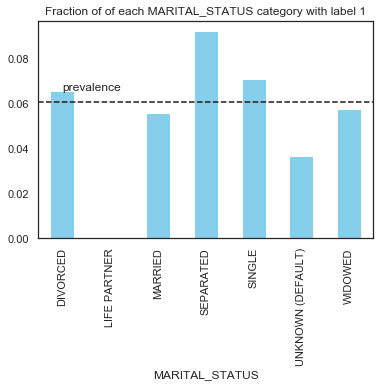

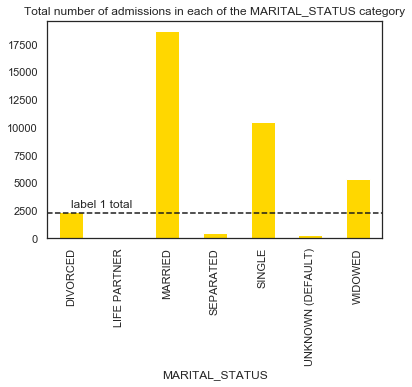

In [267]:
plot_summary('MARITAL_STATUS')

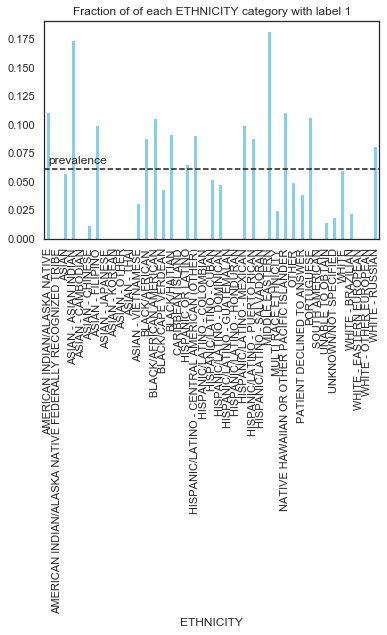

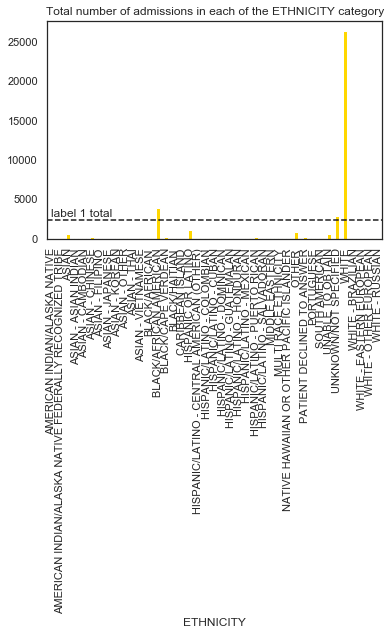

In [268]:
plot_summary('ETHNICITY')

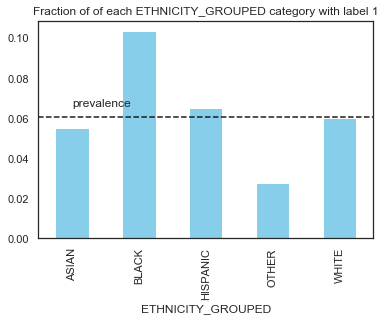

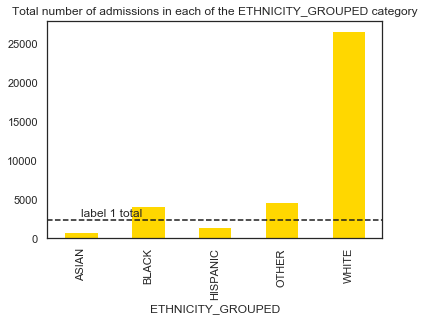

In [269]:
# there are a lot of categories, let's group the ethnicity categories
# Most of the categories are related to 5 major groups - Asian, Black, Hispanic, White and other
combined_df['ETHNICITY_GROUPED'] = combined_df['ETHNICITY'].str.split("/|\s").str.get(0)
ethnicity_list = ['ASIAN','BLACK','HISPANIC','WHITE']
combined_df.loc[~combined_df['ETHNICITY_GROUPED'].isin(ethnicity_list),'ETHNICITY_GROUPED'] = 'OTHER'
plot_summary('ETHNICITY_GROUPED')

#### The fraction of readmitted black patients is higher than expected.

In [270]:
print(list_of_cols[10:20])

['1Y_PRIOR_ADM', 'LENGTH_OF_STAY_DAYS', 'GENDER', 'AGE', 'CURR_SERVICE_CMED', 'CURR_SERVICE_CSURG', 'CURR_SERVICE_MED', 'CURR_SERVICE_NBB', 'CURR_SERVICE_NMED', 'CURR_SERVICE_NSURG']


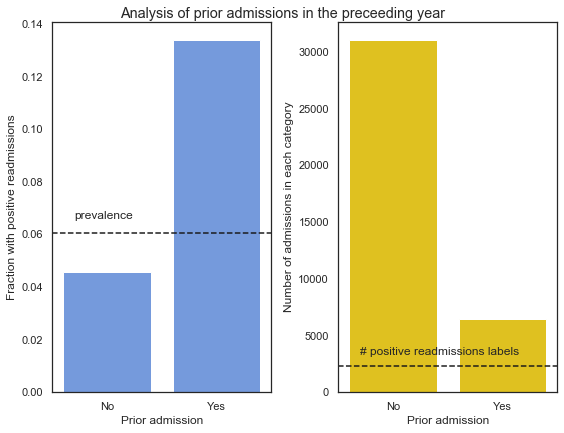

In [623]:
f = plt.figure(figsize=(8,6))
gs = f.add_gridspec(1, 2)

sum_df = pd.crosstab(combined_df['1Y_PRIOR_ADM'], combined_df.OUTPUT_LABEL)
sum_df['count'] = sum_df[0.0]+sum_df[1.0]
sum_df['pos_fraction'] = sum_df[1.0]/sum_df['count']
sum_df.reset_index(inplace=True)

ax1 = f.add_subplot(gs[0, 0])
ax1 = sns.barplot(x="1Y_PRIOR_ADM", y="pos_fraction", data=sum_df, color='cornflowerblue')
ax1.axhline(prevalence, ls='--', c='k')
ax1.annotate('prevalence', (-0.3,prevalence+0.005))
ax1.set_xticklabels(['No', 'Yes'])
ax1.set_xlabel('Prior admission')
ax1.set_ylabel('Fraction with positive readmissions')

ax2 = f.add_subplot(gs[0, 1])
ax1 = sns.barplot(x="1Y_PRIOR_ADM", y="count", data=sum_df, color='gold')
ax2.axhline(counts[1], ls='--', c='k')
ax2.annotate('# positive readmissions labels', (-0.3,counts[1]+1000))
ax2.set_xticklabels(['No', 'Yes'])
ax2.set_xlabel('Prior admission')
ax2.set_ylabel('Number of admissions in each category')

plt.suptitle('Analysis of prior admissions in the preceeding year', y=0.999)
plt.tight_layout()
plt.savefig('../../reports/figures/1year_readm.png', format='png')

#### Redmission in the prior year is a relevant factor since the fraction of readmitted patients with prior admissions is twice higher than expected.

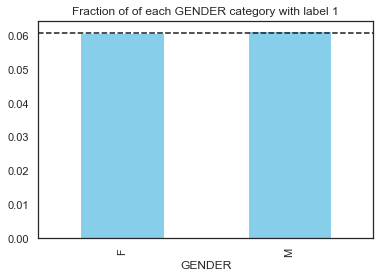

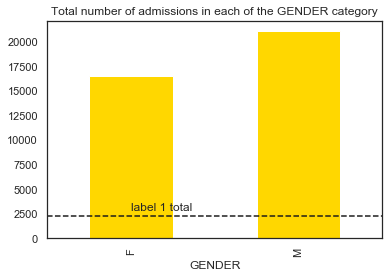

In [257]:
plot_summary('GENDER')

In [49]:
!pip install seaborn

     |████████████████████████████████| 215 kB 2.5 MB/s eta 0:00:01


Text(0.5, 1.0, 'Age vs leangth of hospital stay')

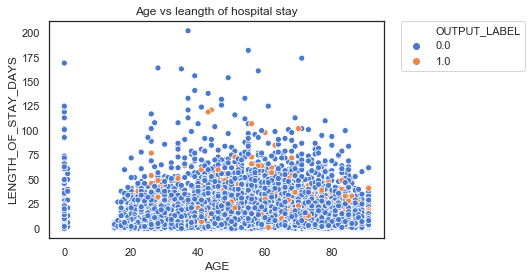

In [229]:
import seaborn as sns
sns.set_style('white')
sns.set_palette("muted")
sns.scatterplot(x=combined_df.AGE, y=combined_df.LENGTH_OF_STAY_DAYS, hue=combined_df.OUTPUT_LABEL)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Age vs leangth of hospital stay")

In [230]:
# It looks like there are still several infant patients in the dataset. These should be filtered out, as the goal 
# of the project is to classify adult readmissions.
combined_df = combined_df[combined_df.AGE>=10]

Text(0.5, 1.0, 'Age vs leangth of hospital stay')

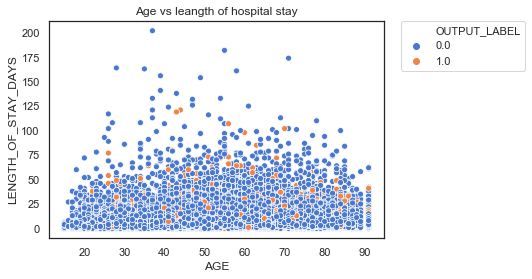

In [231]:
sns.scatterplot(x=combined_df.AGE, y=combined_df.LENGTH_OF_STAY_DAYS, hue=combined_df.OUTPUT_LABEL)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Age vs leangth of hospital stay")

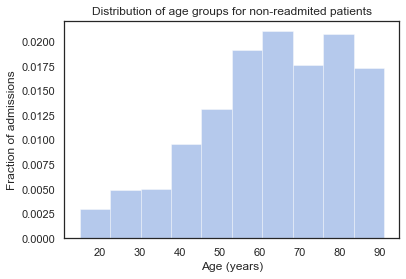

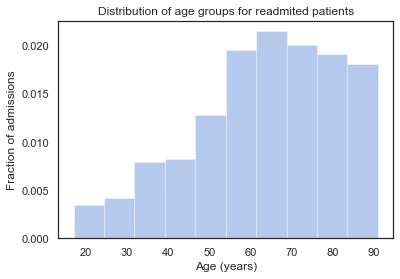

In [232]:
sns.distplot(combined_df[combined_df.OUTPUT_LABEL==0]['AGE'], bins=10, kde=False, norm_hist=True)
plt.xlabel('Age (years)')
plt.ylabel('Fraction of admissions')
plt.title("Distribution of age groups for non-readmited patients")
plt.show()
sns.distplot(combined_df[combined_df.OUTPUT_LABEL==1]['AGE'], bins=10, kde=False, norm_hist=True)
plt.xlabel('Age (years)')
plt.ylabel('Fraction of admissions')
plt.title("Distribution of age groups for readmited patients")
plt.show()

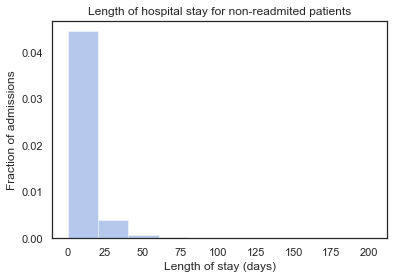

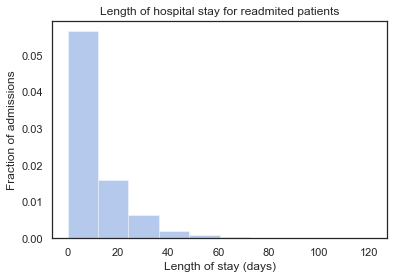

In [233]:
sns.distplot(combined_df[combined_df.OUTPUT_LABEL==0]['LENGTH_OF_STAY_DAYS'], bins=10, kde=False, norm_hist=True)
plt.xlabel('Length of stay (days)')
plt.ylabel('Fraction of admissions')
plt.title("Length of hospital stay for non-readmited patients")
plt.show()
sns.distplot(combined_df[combined_df.OUTPUT_LABEL==1]['LENGTH_OF_STAY_DAYS'], bins=10, kde=False, norm_hist=True)
plt.xlabel('Length of stay (days)')
plt.ylabel('Fraction of admissions')
plt.title("Length of hospital stay for readmited patients")
plt.show()

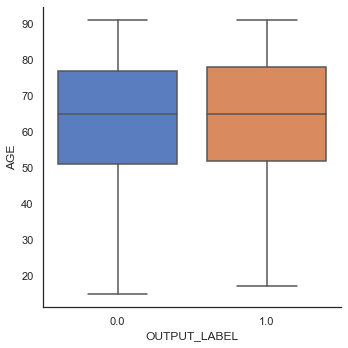

In [234]:
sns.catplot(x="OUTPUT_LABEL", y="AGE", kind='box', data=combined_df);

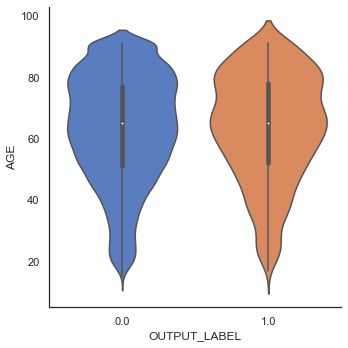

In [235]:
sns.catplot(x="OUTPUT_LABEL", y="AGE", kind='violin', data=combined_df);

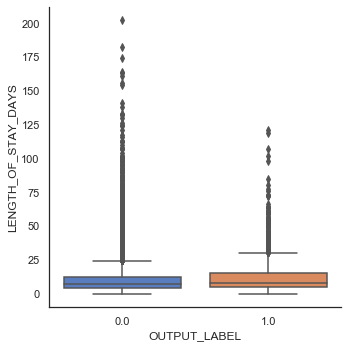

In [236]:
sns.catplot(x="OUTPUT_LABEL", y="LENGTH_OF_STAY_DAYS", kind='box', data=combined_df);

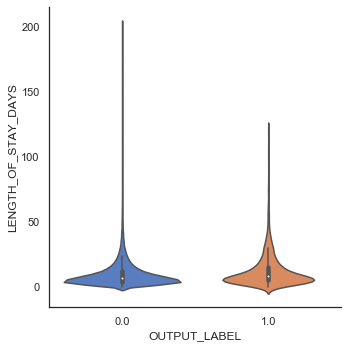

In [237]:
sns.catplot(x="OUTPUT_LABEL", y="LENGTH_OF_STAY_DAYS", kind='violin', data=combined_df);

#### The average age and length of stay appear slightly higher for readmitted patients.

In [238]:
# get the current services columns
curr_cols = [column for column in combined_df.columns.tolist() if column.startswith('CURR_SERVICE_')]
curr_cols

['CURR_SERVICE_CMED',
 'CURR_SERVICE_CSURG',
 'CURR_SERVICE_MED',
 'CURR_SERVICE_NBB',
 'CURR_SERVICE_NMED',
 'CURR_SERVICE_NSURG',
 'CURR_SERVICE_OMED',
 'CURR_SERVICE_ORTHO',
 'CURR_SERVICE_SURG',
 'CURR_SERVICE_TRAUM',
 'CURR_SERVICE_TSURG',
 'CURR_SERVICE_VSURG']

In [239]:
# check to see if there are any more newborn baby services left after age filtering
combined_df[combined_df.CURR_SERVICE_NBB!=0]['HADM_ID'].count()

0

In [240]:
# drop the newborn baby services column
combined_df.drop('CURR_SERVICE_NBB', axis=1, inplace=True)

In [241]:
# get the current services columns again
curr_cols = [column for column in combined_df.columns.tolist() if column.startswith('CURR_SERVICE_')]
curr_cols

['CURR_SERVICE_CMED',
 'CURR_SERVICE_CSURG',
 'CURR_SERVICE_MED',
 'CURR_SERVICE_NMED',
 'CURR_SERVICE_NSURG',
 'CURR_SERVICE_OMED',
 'CURR_SERVICE_ORTHO',
 'CURR_SERVICE_SURG',
 'CURR_SERVICE_TRAUM',
 'CURR_SERVICE_TSURG',
 'CURR_SERVICE_VSURG']

### Exploration of current services columns
Note, since the services were not mutually exclusive and each admssion was associated with one ore more services, we will consider each service as a separate category. In this case the values for the categogy will be the number of times the service was observed for each admission, i.e. 0, 1, 2... etc.

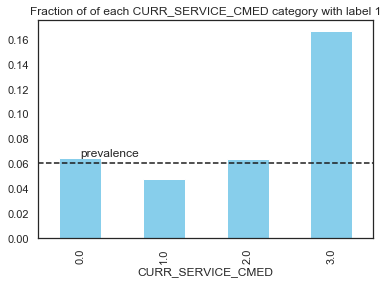

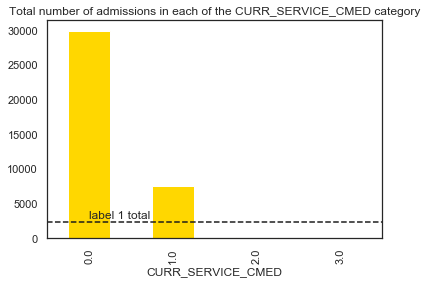

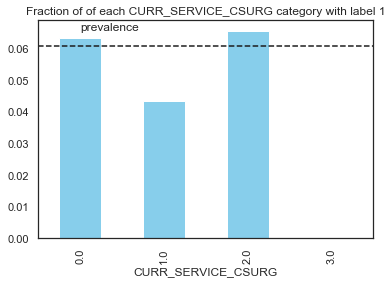

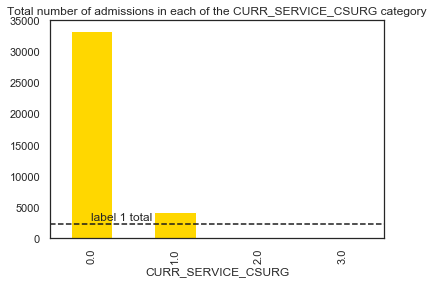

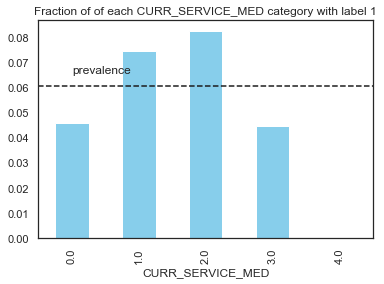

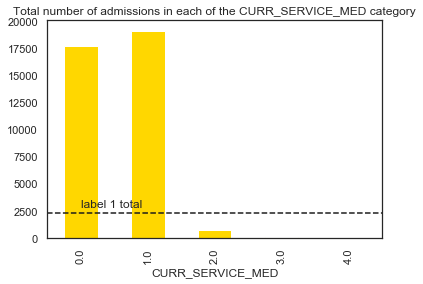

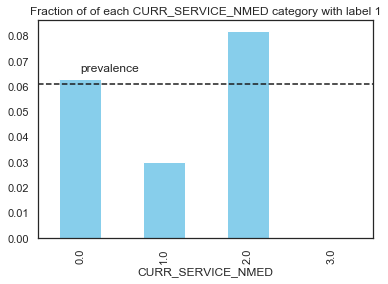

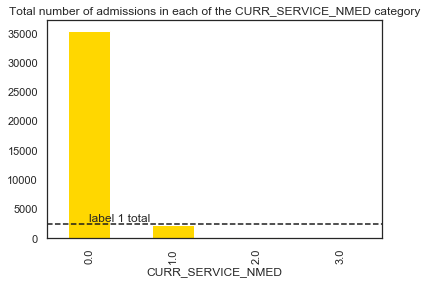

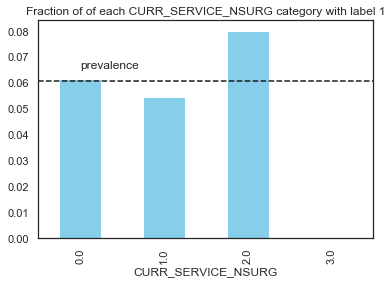

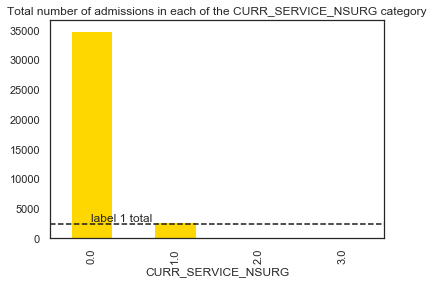

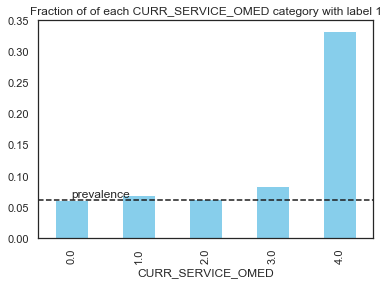

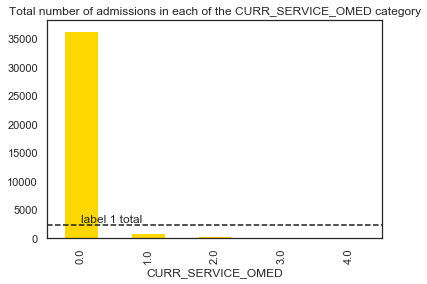

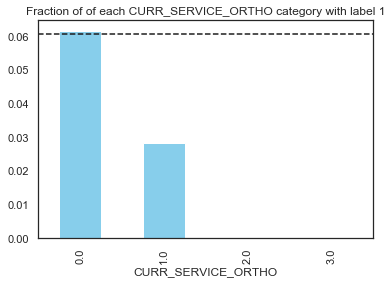

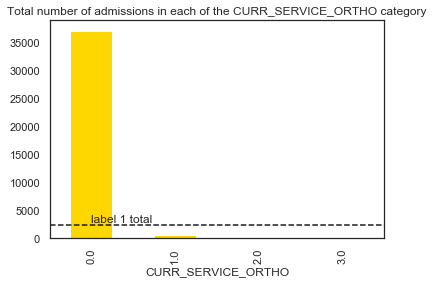

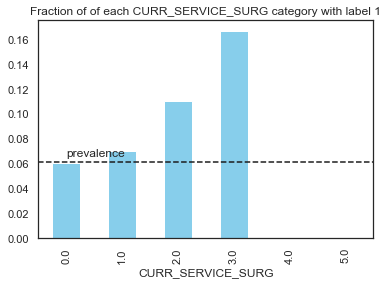

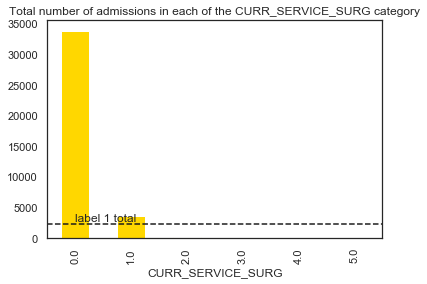

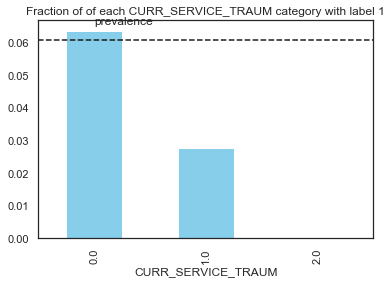

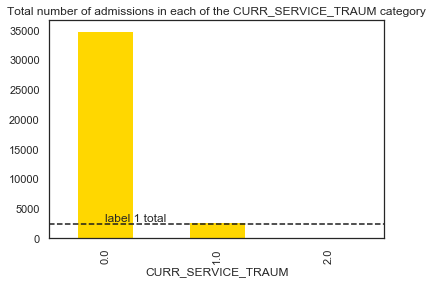

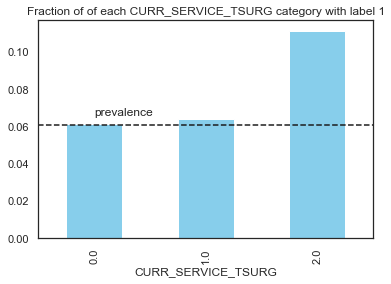

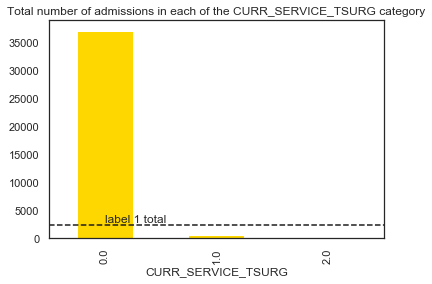

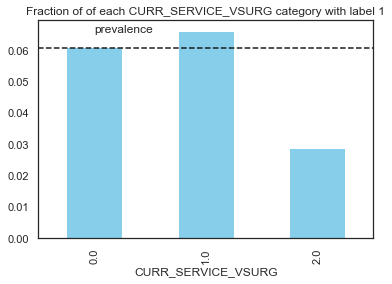

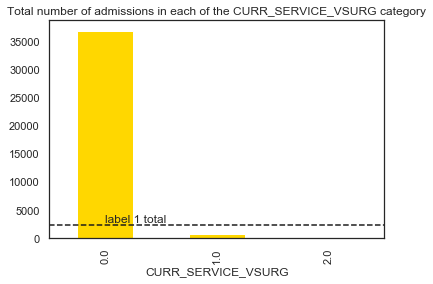

In [272]:
for column in curr_cols:
    plot_summary(column)

In [141]:
# recalculate the prevelance after age filtering
counts = combined_df.groupby('OUTPUT_LABEL')['HADM_ID'].count().values
prevalence = counts[1]/(counts[0]+counts[1])
print("The prevalence of 30-day readmissions is ", prevalence)

The prevalence of 30-day readmissions is  0.060977881876979584


A few services occur more frequently than the prevelance rate. However, the total counts are fairly low. Let's the next group of columns. 

In [89]:
combined_df.OUTPUT_LABEL

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
37807    0.0
37808    0.0
37809    0.0
37810    0.0
37811    0.0
Name: OUTPUT_LABEL, Length: 37812, dtype: float64

In [273]:
combined_df.columns.tolist().index('CURR_SERVICE_VSURG')

23

In [275]:
combined_df.columns.tolist()[24:40]

['SECTIONHEADER_Anesthesia',
 'SECTIONHEADER_Emerging technology',
 'SECTIONHEADER_Evaluation and management',
 'SECTIONHEADER_Medicine',
 'SECTIONHEADER_Pathology and laboratory',
 'SECTIONHEADER_Radiology',
 'SECTIONHEADER_Surgery',
 'SUBSECTIONHEADER_Bone/joint studies',
 'SUBSECTIONHEADER_Cardiovascular',
 'SUBSECTIONHEADER_Cardiovascular system',
 'SUBSECTIONHEADER_Case management services',
 'SUBSECTIONHEADER_Central nervous system assessments/tests (neuro-cognitive, mental status, speech testing)',
 'SUBSECTIONHEADER_Chemistry',
 'SUBSECTIONHEADER_Confirmatory consultation for a new or established patient (deleted codes)',
 'SUBSECTIONHEADER_Conscious sedation (deleted codes)',
 'SUBSECTIONHEADER_Consultations']

In [276]:
# get the sectionheader columns of performed procedures
sect_cols = [column for column in combined_df.columns.tolist() if column.startswith('SECTIONHEADER_')]
sect_cols

['SECTIONHEADER_Anesthesia',
 'SECTIONHEADER_Emerging technology',
 'SECTIONHEADER_Evaluation and management',
 'SECTIONHEADER_Medicine',
 'SECTIONHEADER_Pathology and laboratory',
 'SECTIONHEADER_Radiology',
 'SECTIONHEADER_Surgery']

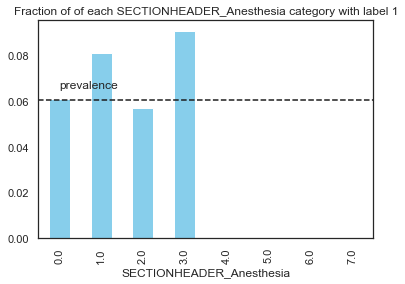

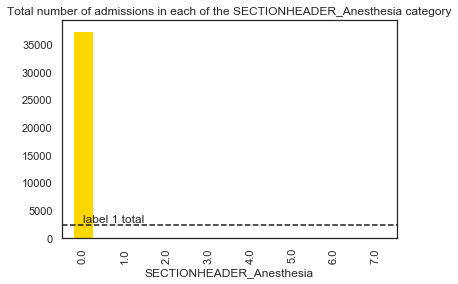

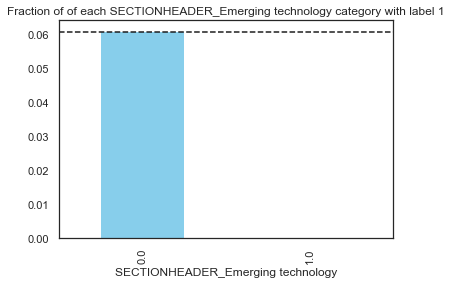

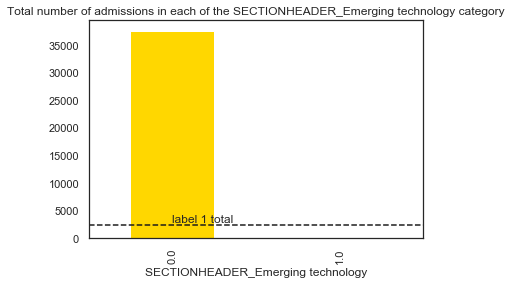

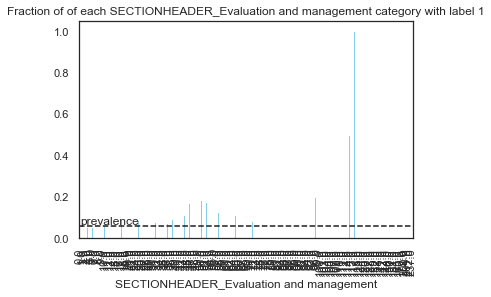

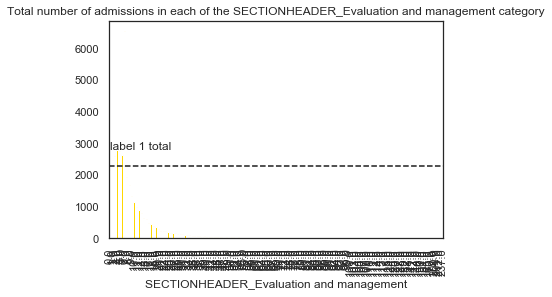

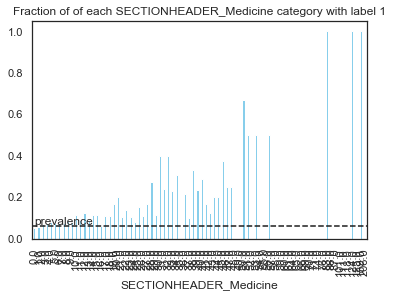

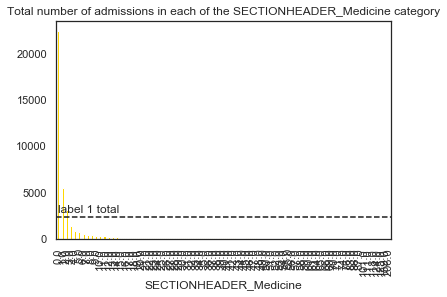

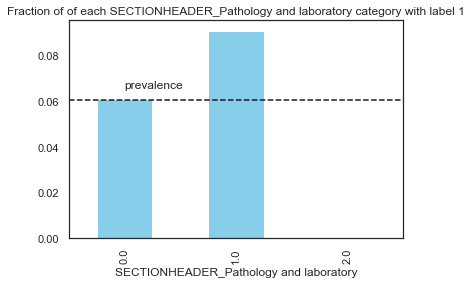

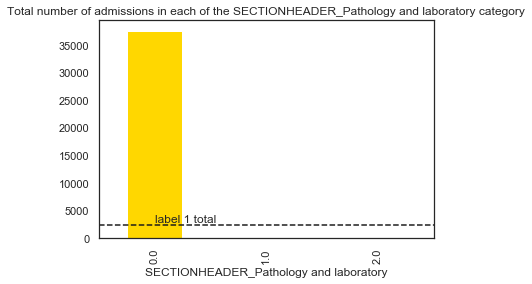

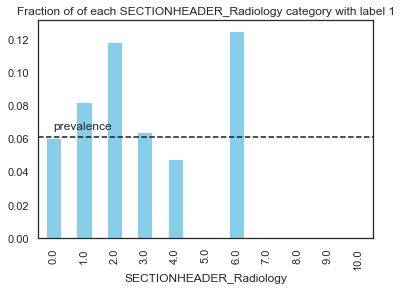

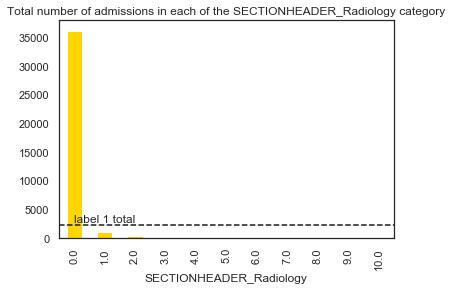

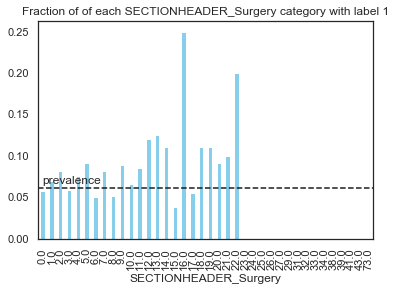

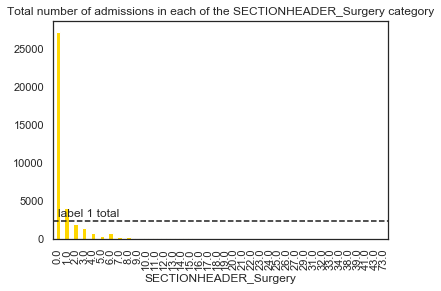

In [277]:
for column in sect_cols:
    plot_summary(column)

In [279]:
# check to see if there are non zero procedures with sectionheader emerging technology
combined_df[combined_df['SECTIONHEADER_Emerging technology']!=0]['HADM_ID'].count()

3

In [280]:
#drop the column, sicne there are aonly 3 non-zero rows
combined_df.drop('SECTIONHEADER_Emerging technology', axis=1, inplace=True)

In [299]:
subsect_cols = [column for column in combined_df.columns.tolist() if column.startswith('SUBSECTIONHEADER_')]
subsect_cols

['SUBSECTIONHEADER_Bone/joint studies',
 'SUBSECTIONHEADER_Cardiovascular',
 'SUBSECTIONHEADER_Cardiovascular system',
 'SUBSECTIONHEADER_Case management services',
 'SUBSECTIONHEADER_Central nervous system assessments/tests (neuro-cognitive, mental status, speech testing)',
 'SUBSECTIONHEADER_Chemistry',
 'SUBSECTIONHEADER_Confirmatory consultation for a new or established patient (deleted codes)',
 'SUBSECTIONHEADER_Conscious sedation (deleted codes)',
 'SUBSECTIONHEADER_Consultations',
 'SUBSECTIONHEADER_Critical care services',
 'SUBSECTIONHEADER_Diagnostic imaging',
 'SUBSECTIONHEADER_Diagnostic ultrasound',
 'SUBSECTIONHEADER_Dialysis',
 'SUBSECTIONHEADER_Digestive system',
 'SUBSECTIONHEADER_End-Stage Renal Disease Services (deleted codes)',
 'SUBSECTIONHEADER_Endocrine system',
 'SUBSECTIONHEADER_Eye and ocular adnexa',
 'SUBSECTIONHEADER_Female genital system',
 'SUBSECTIONHEADER_Follow-up inpatient consultations (deleted codes)',
 'SUBSECTIONHEADER_General',
 'SUBSECTIONHEADE

In [302]:
count_track = []
for column in subsect_cols:
    col_count = combined_df[combined_df[column]!=0]['HADM_ID'].count()
    count_track.append(col_count)
print(count_track)

[63, 458, 5164, 84, 18, 8, 46, 28, 12720, 25235, 344, 1195, 1668, 1923, 2, 9, 11, 61, 754, 0, 27, 175, 32922, 149, 42, 560, 0, 13, 29, 50, 46, 1750, 1291, 10, 26, 0, 139, 31, 204, 21, 56, 4, 157, 11, 493, 340, 13610, 12, 3305, 183, 9, 2, 3, 178]


In [303]:
# filter out columns with <100 non-zero entries
subsect_cols_filt = [column for column in subsect_cols if count_track[subsect_cols.index(column)]>=100]
subsect_cols_filt

['SUBSECTIONHEADER_Cardiovascular',
 'SUBSECTIONHEADER_Cardiovascular system',
 'SUBSECTIONHEADER_Consultations',
 'SUBSECTIONHEADER_Critical care services',
 'SUBSECTIONHEADER_Diagnostic imaging',
 'SUBSECTIONHEADER_Diagnostic ultrasound',
 'SUBSECTIONHEADER_Dialysis',
 'SUBSECTIONHEADER_Digestive system',
 'SUBSECTIONHEADER_Follow-up inpatient consultations (deleted codes)',
 'SUBSECTIONHEADER_Hemic and lymphatic systems',
 'SUBSECTIONHEADER_Hospital inpatient services',
 'SUBSECTIONHEADER_Hospital observation services',
 'SUBSECTIONHEADER_Integumentary system',
 'SUBSECTIONHEADER_Musculoskeletal system',
 'SUBSECTIONHEADER_Nervous system',
 'SUBSECTIONHEADER_Noninvasive vascular diagnostic studies',
 'SUBSECTIONHEADER_Operating microscope (deleted code)',
 'SUBSECTIONHEADER_Physical medicine and rehabilitation',
 'SUBSECTIONHEADER_Prolonged services',
 'SUBSECTIONHEADER_Psychiatry',
 'SUBSECTIONHEADER_Pulmonary',
 'SUBSECTIONHEADER_Respiratory system',
 'SUBSECTIONHEADER_Special ser

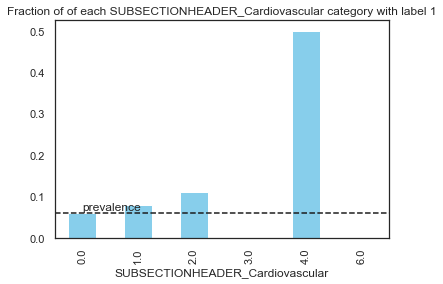

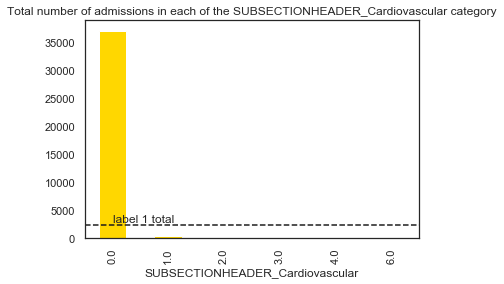

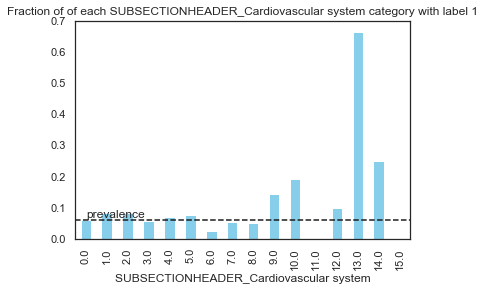

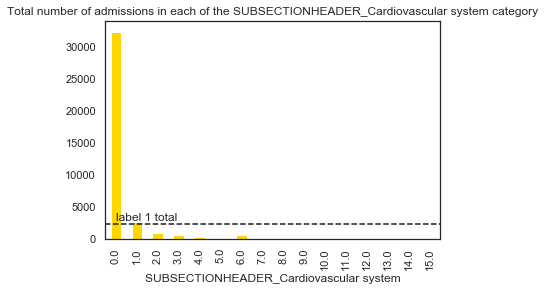

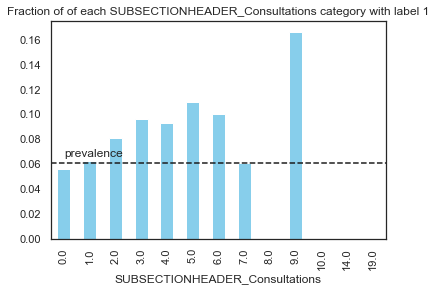

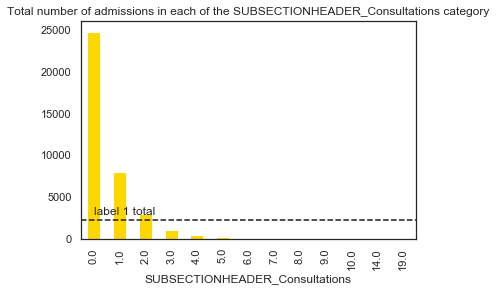

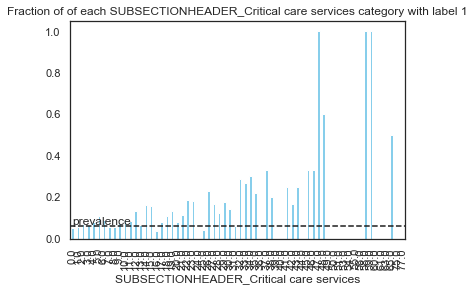

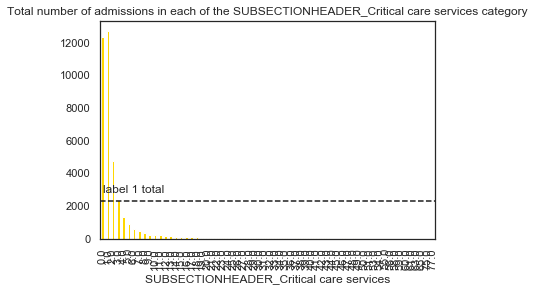

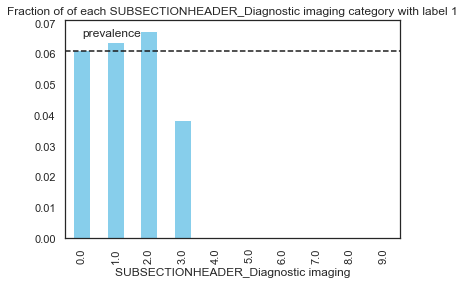

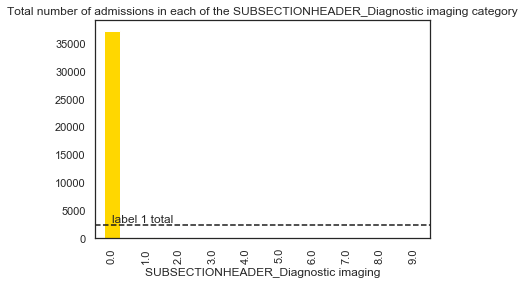

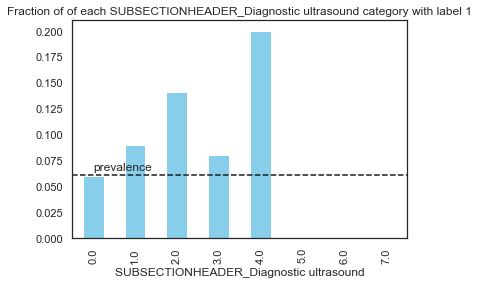

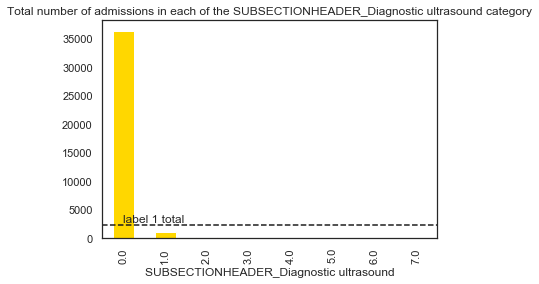

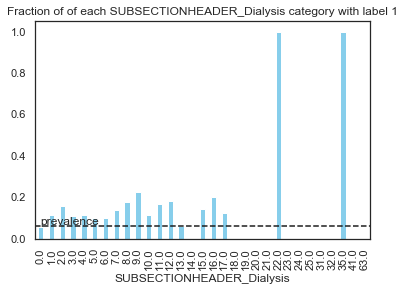

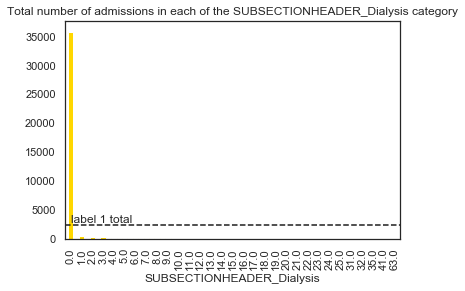

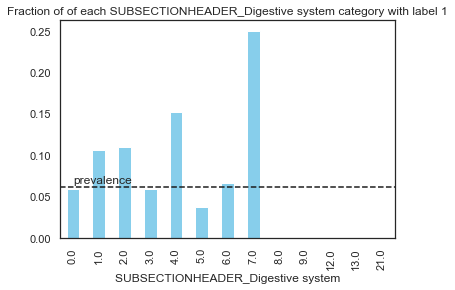

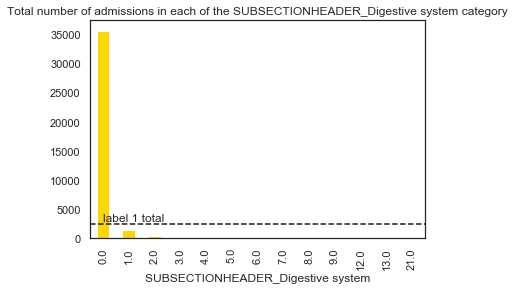

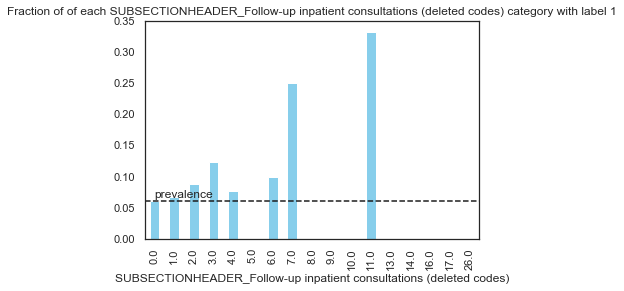

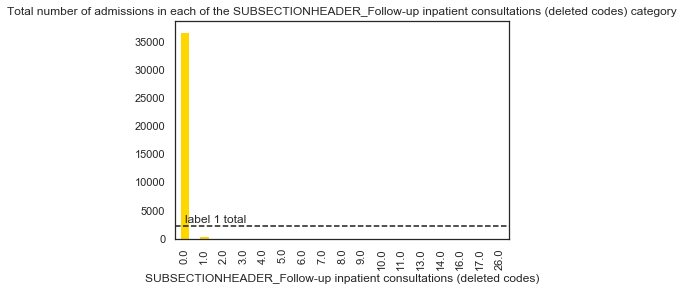

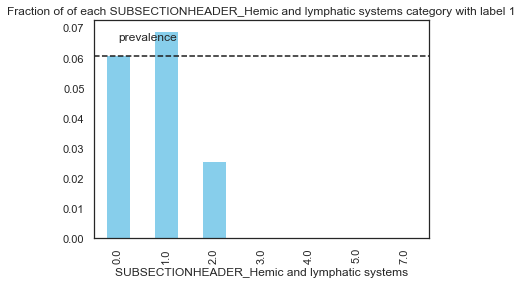

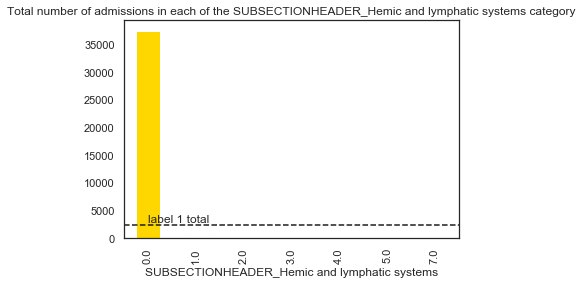

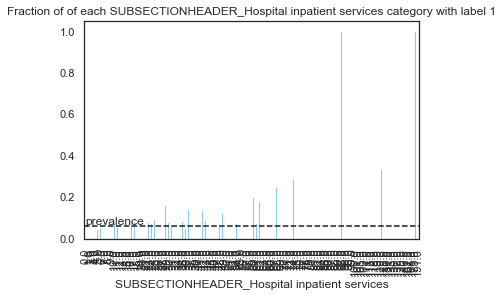

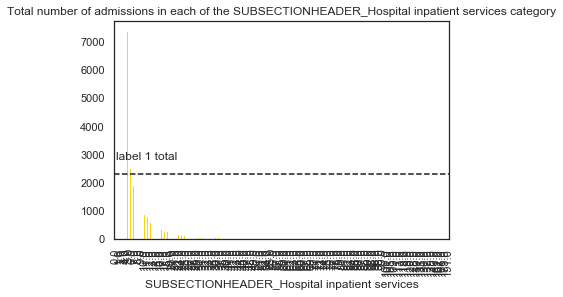

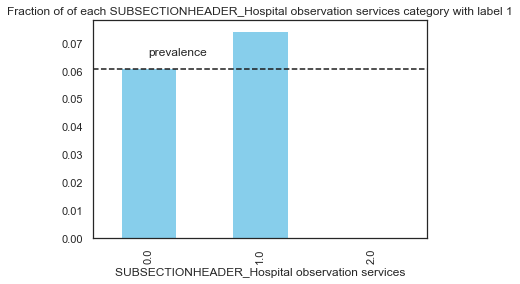

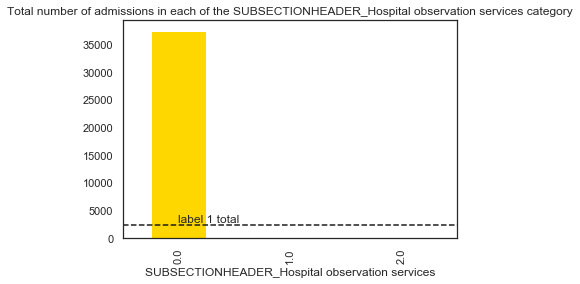

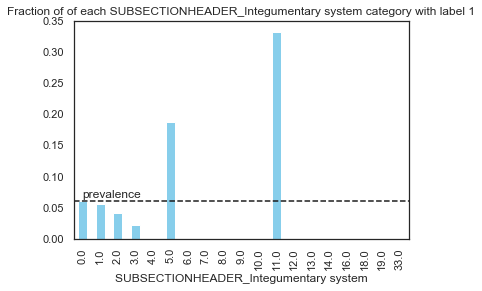

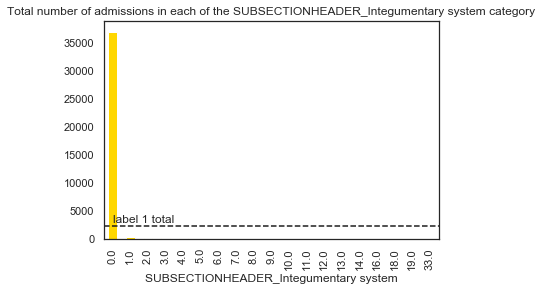

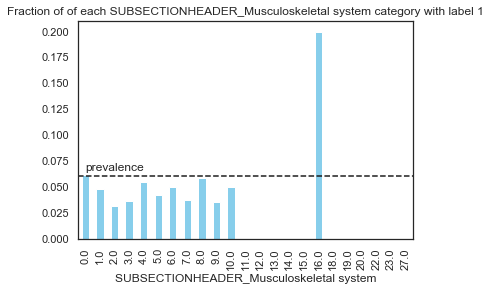

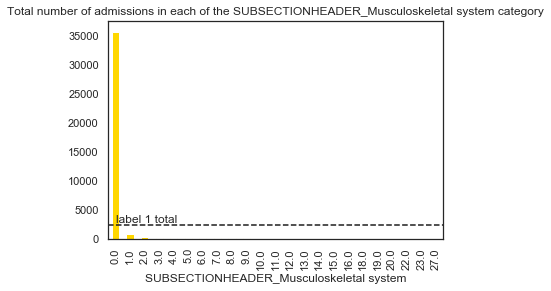

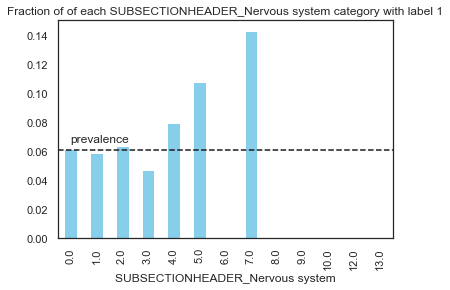

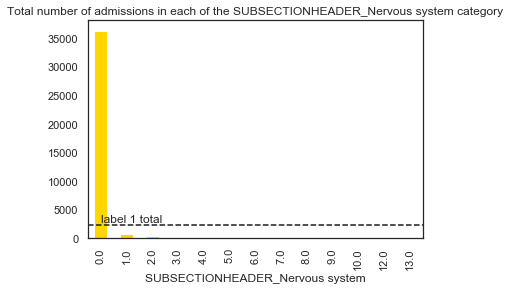

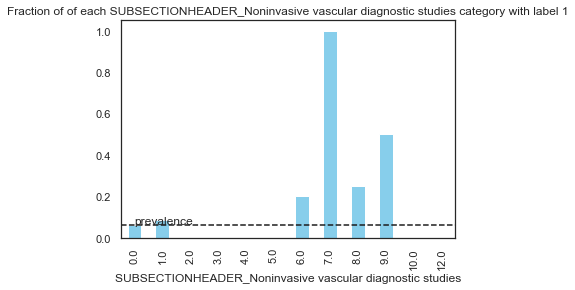

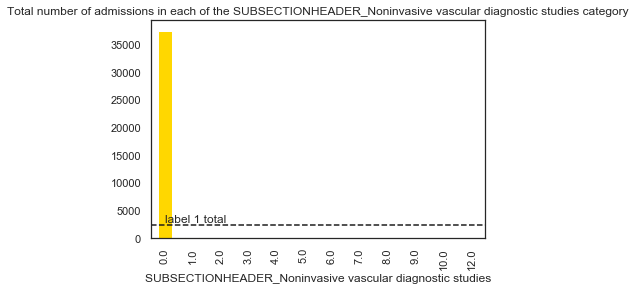

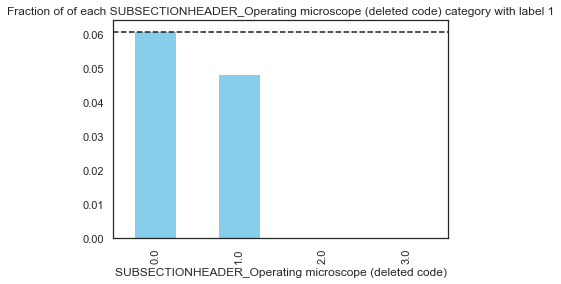

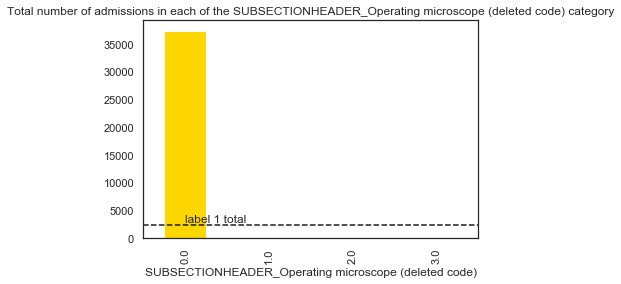

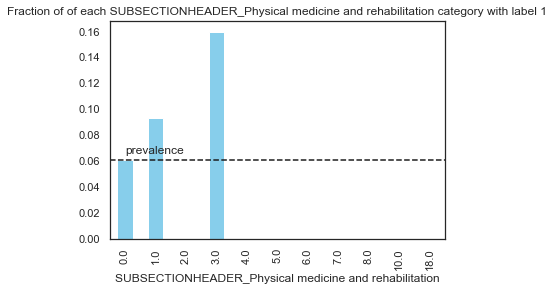

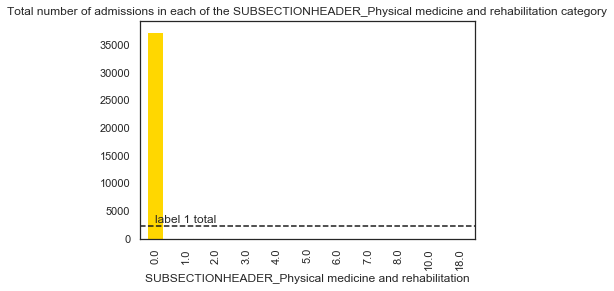

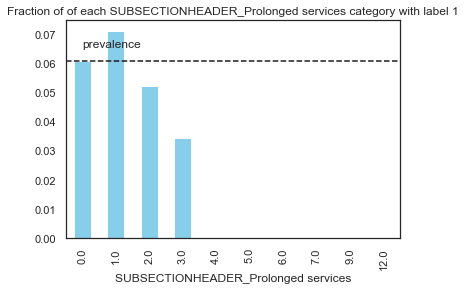

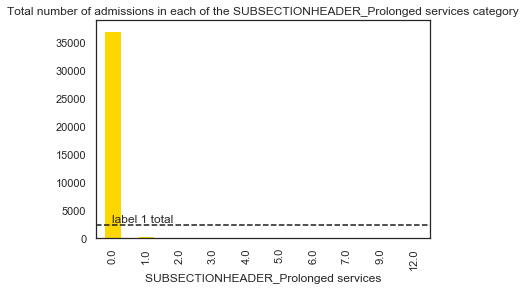

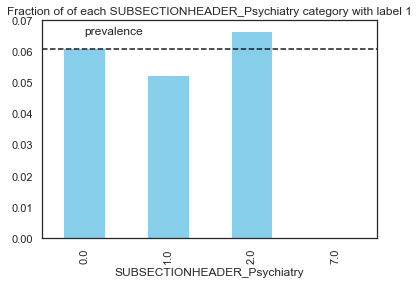

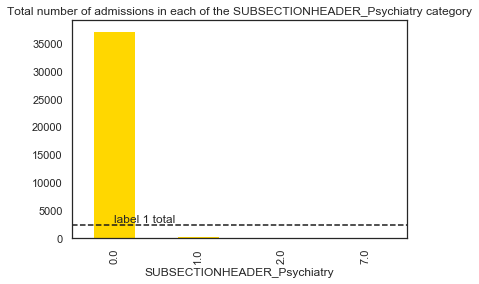

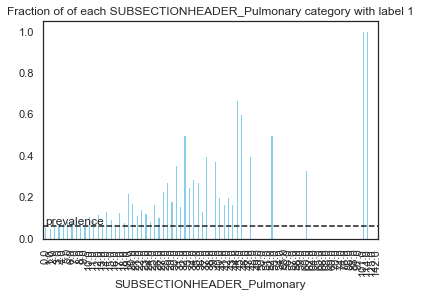

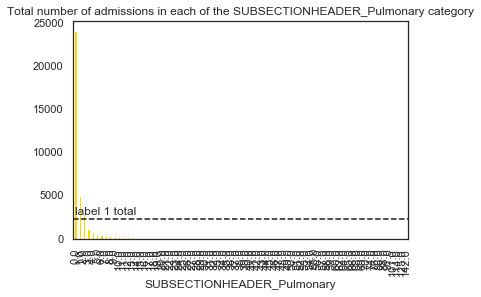

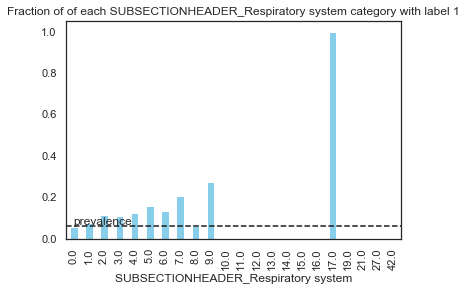

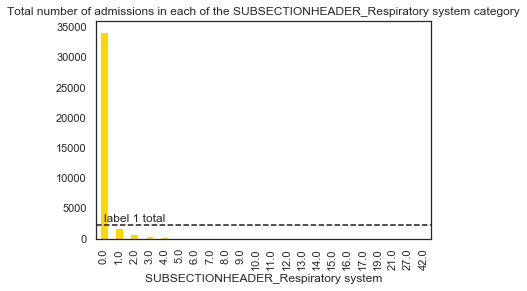

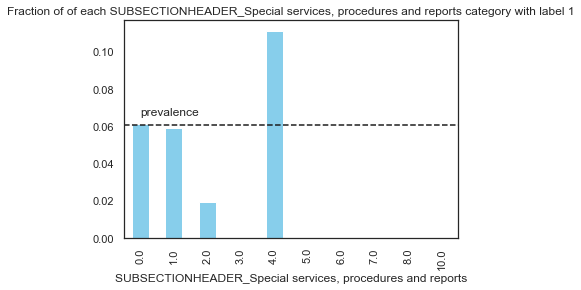

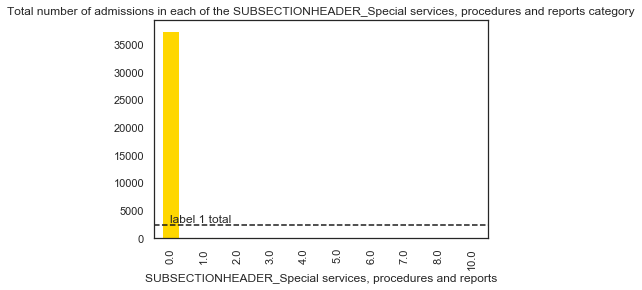

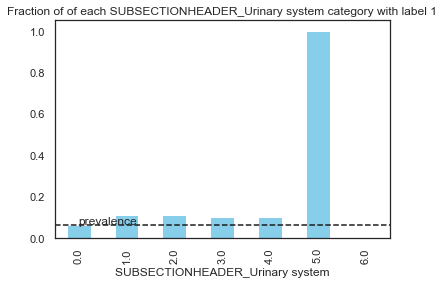

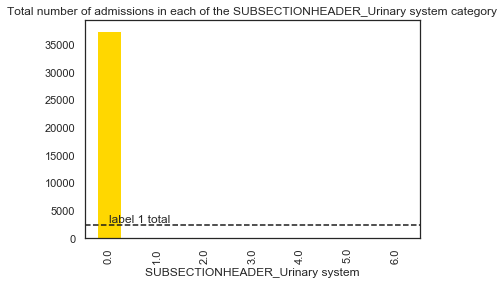

In [304]:
for column in subsect_cols_filt:
    plot_summary(column)

In [313]:
combined_df.columns.tolist().index('SUBSECTIONHEADER_Urinary system')

83

In [314]:
combined_df.columns.tolist()[83:100]

['SUBSECTIONHEADER_Urinary system',
 'Count_Alanine Aminotransferase (ALT)',
 'Count_Alkaline Phosphatase',
 'Count_Anion Gap',
 'Count_Asparate Aminotransferase (AST)',
 'Count_Base Excess',
 'Count_Basophils',
 'Count_Bicarbonate',
 'Count_Bilirubin, Total',
 'Count_Calcium, Total',
 'Count_Calculated Total CO2',
 'Count_Chloride',
 'Count_Creatine Kinase (CK)',
 'Count_Creatinine',
 'Count_Eosinophils',
 'Count_Free Calcium',
 'Count_Glucose']

In [315]:
mean_cols = [column for column in combined_df.columns.tolist() if column.startswith('Mean_')]
mean_cols

['Mean_Alanine Aminotransferase (ALT)',
 'Mean_Alkaline Phosphatase',
 'Mean_Anion Gap',
 'Mean_Asparate Aminotransferase (AST)',
 'Mean_Base Excess',
 'Mean_Basophils',
 'Mean_Bicarbonate',
 'Mean_Bilirubin, Total',
 'Mean_Calcium, Total',
 'Mean_Calculated Total CO2',
 'Mean_Chloride',
 'Mean_Creatine Kinase (CK)',
 'Mean_Creatinine',
 'Mean_Eosinophils',
 'Mean_Free Calcium',
 'Mean_Glucose',
 'Mean_Hematocrit',
 'Mean_Hemoglobin',
 'Mean_INR(PT)',
 'Mean_Lactate',
 'Mean_Lymphocytes',
 'Mean_MCH',
 'Mean_MCHC',
 'Mean_MCV',
 'Mean_Magnesium',
 'Mean_Monocytes',
 'Mean_Neutrophils',
 'Mean_PT',
 'Mean_PTT',
 'Mean_Phosphate',
 'Mean_Platelet Count',
 'Mean_Potassium',
 'Mean_RDW',
 'Mean_Red Blood Cells',
 'Mean_Sodium',
 'Mean_Specific Gravity',
 'Mean_Urea Nitrogen',
 'Mean_White Blood Cells',
 'Mean_pCO2',
 'Mean_pH',
 'Mean_pO2']

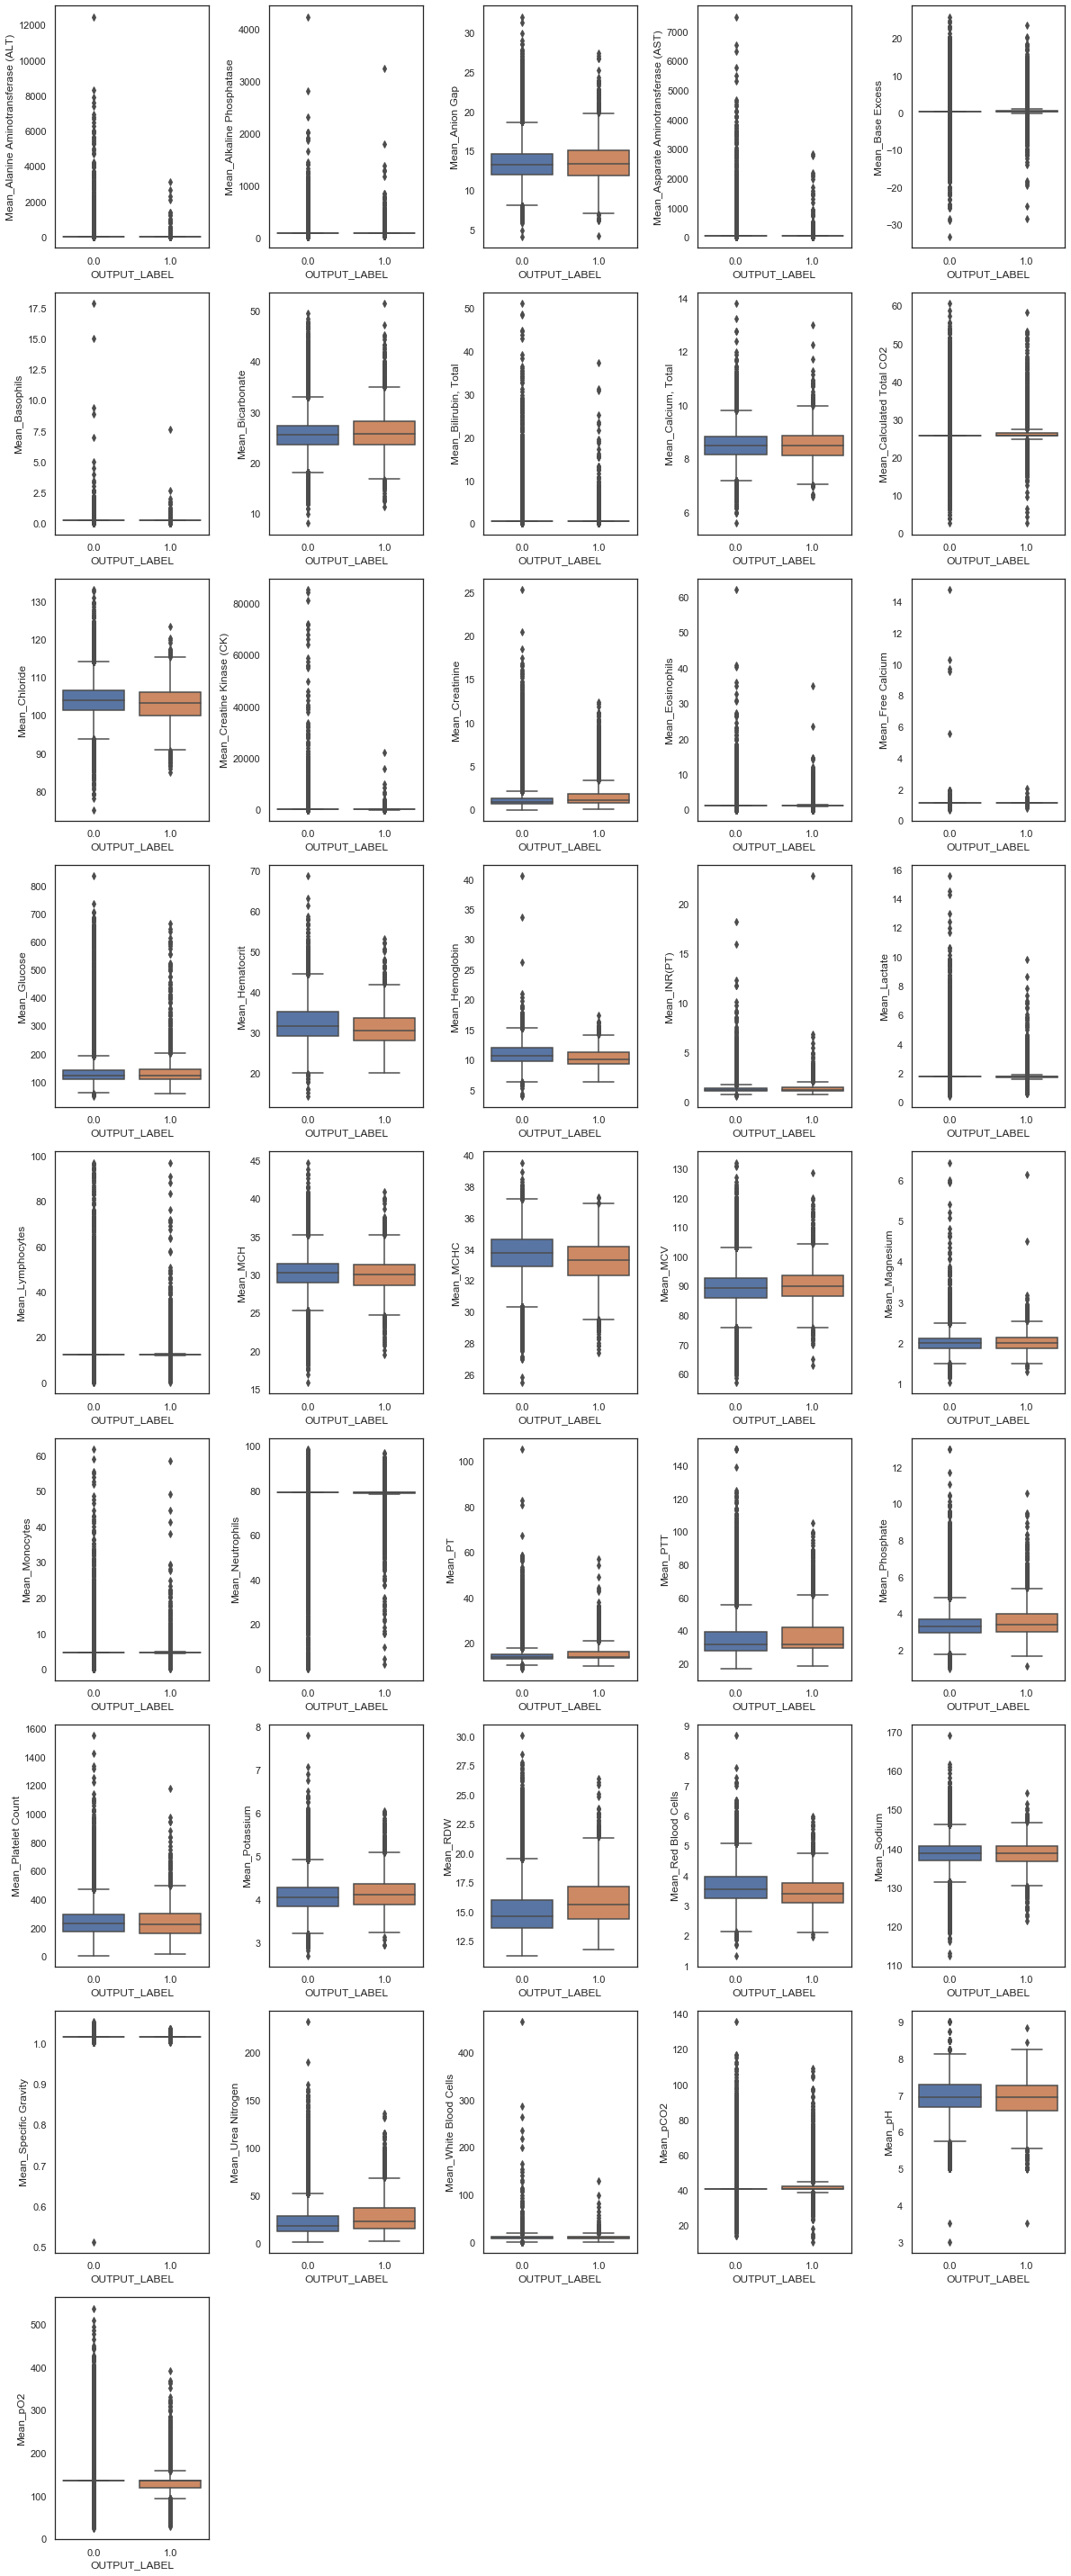

In [361]:
sns.set_style('white')
f = plt.figure(figsize=(20,40))
gs = f.add_gridspec(9, 6)

i=0
j=0
for column in mean_cols:
    ax = f.add_subplot(gs[i, j])
    ax = sns.boxplot(x="OUTPUT_LABEL", y=column, data=combined_df)
    j+=1
    if j==5:
        i+=1
        j=0

plt.tight_layout()

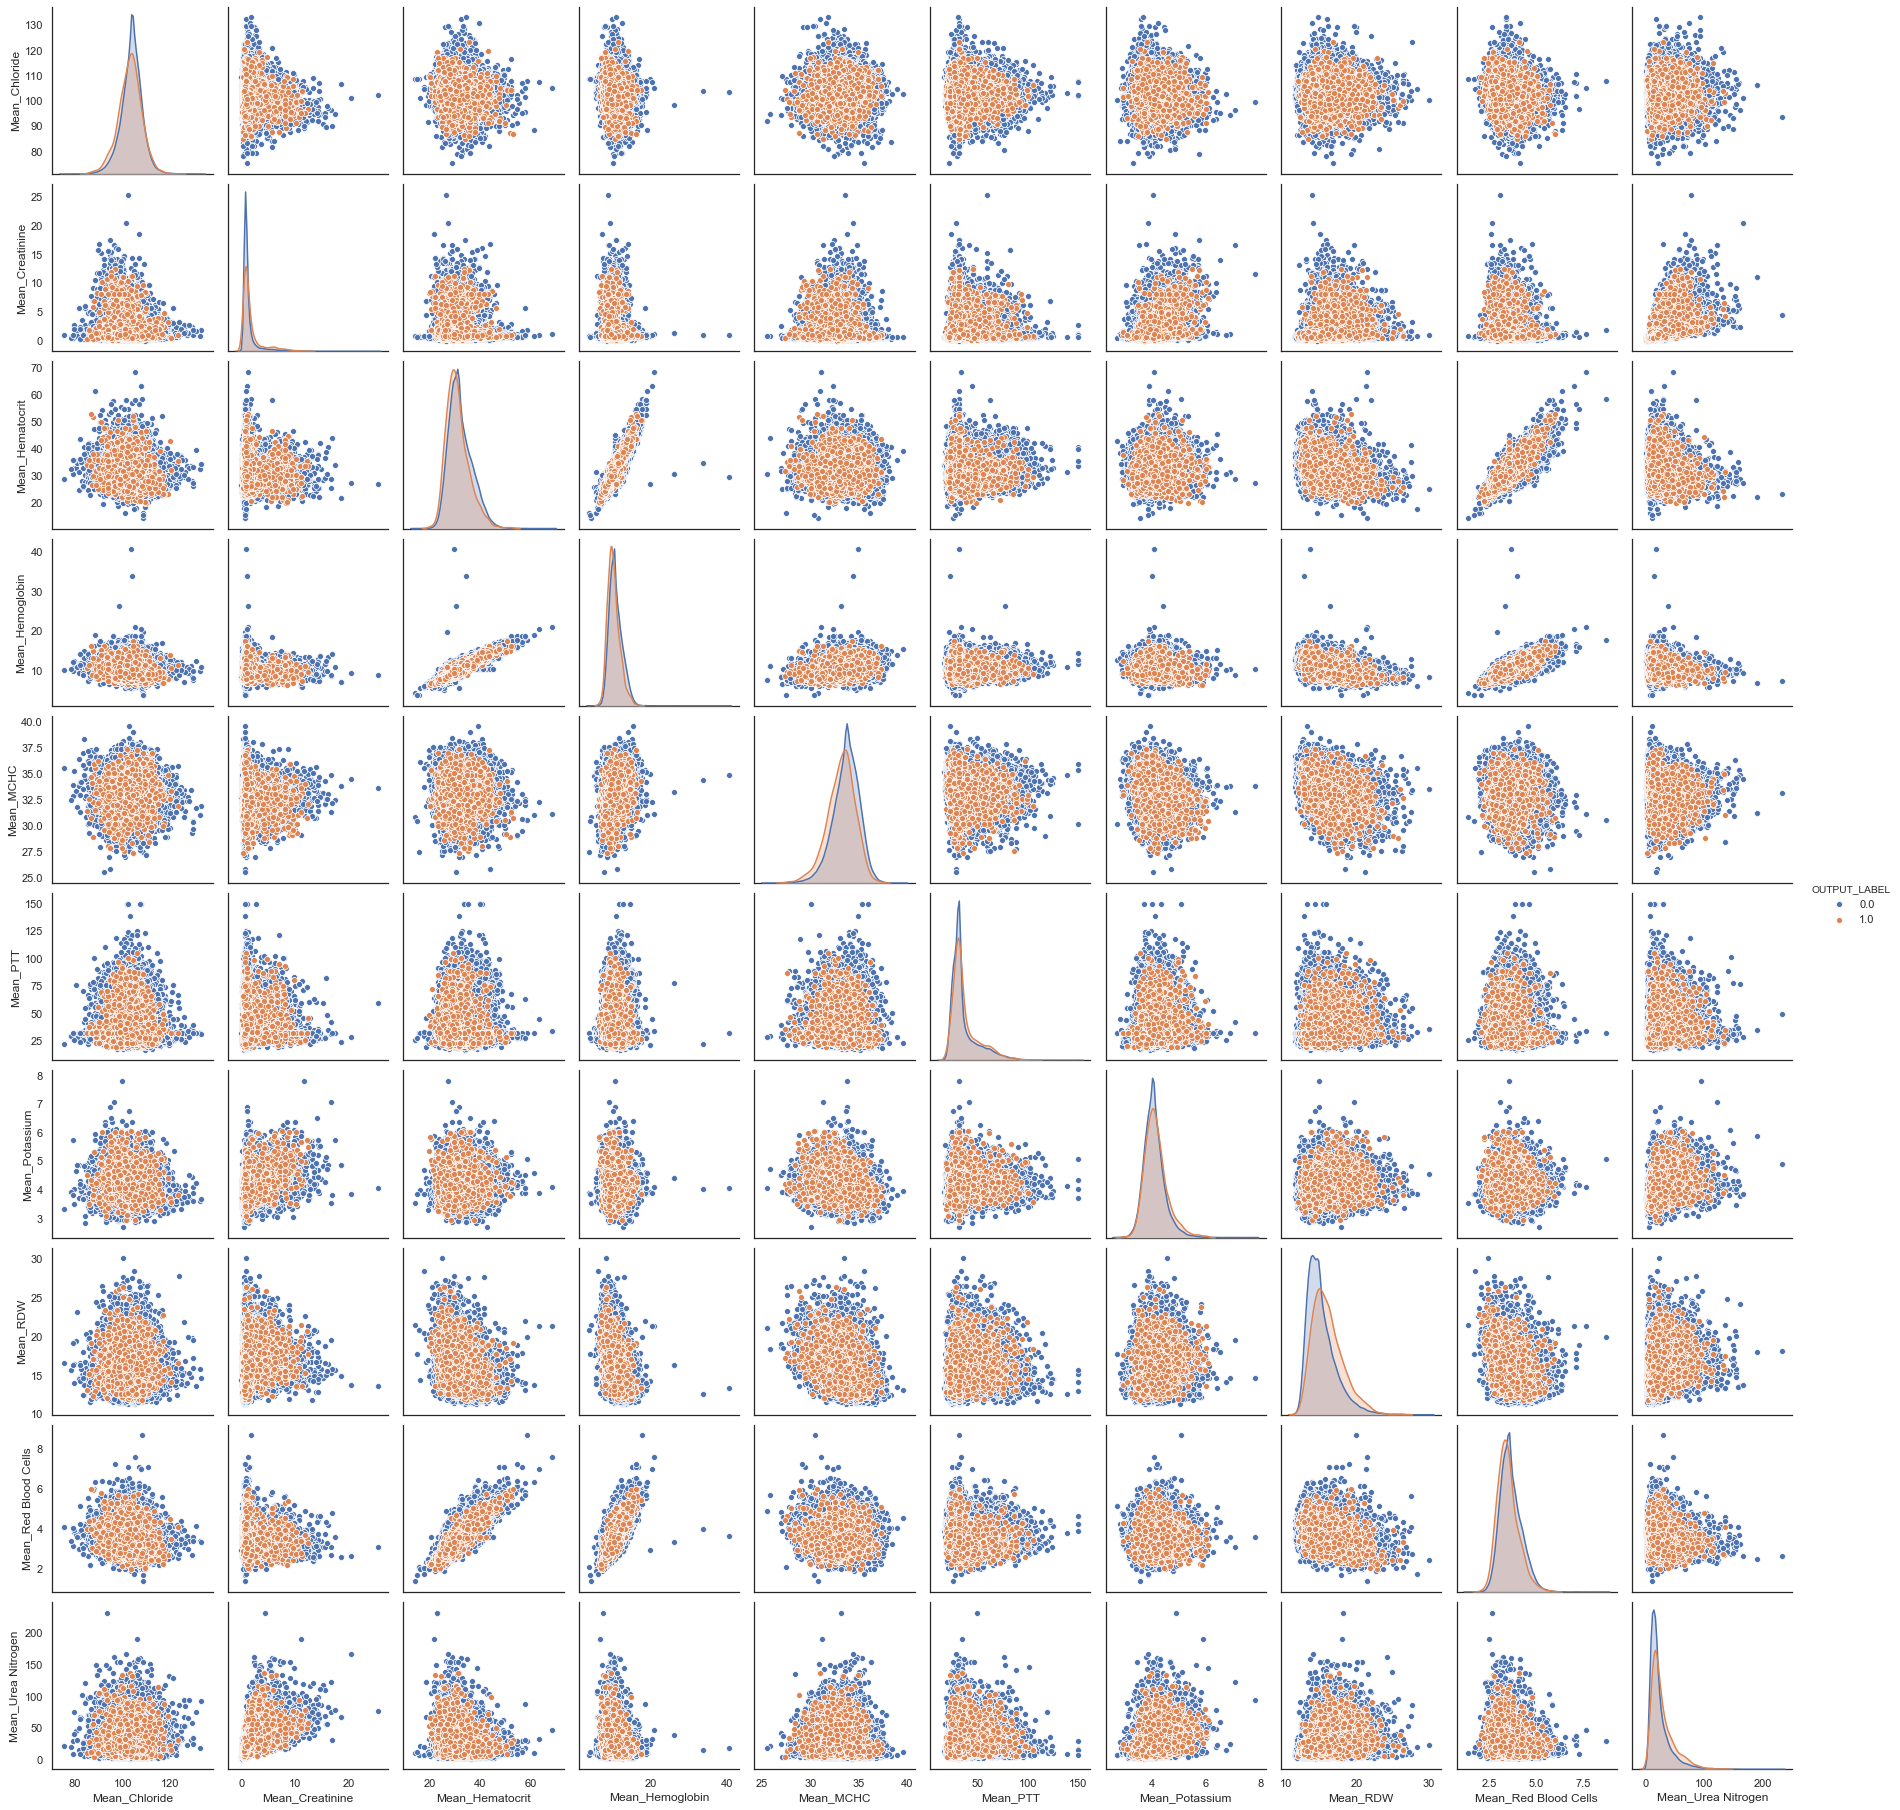

In [368]:
# select a subset od columns, that look to have different distributions for labels 0 and 1 for further analysis
mean_cols_select = ['Mean_Chloride', 'Mean_Creatinine', 'Mean_Hematocrit','Mean_Hemoglobin','Mean_MCHC','Mean_PTT',\
                   'Mean_Potassium', 'Mean_RDW', 'Mean_Red Blood Cells','Mean_Urea Nitrogen',]
sns.pairplot(combined_df, vars=mean_cols_select, hue='OUTPUT_LABEL')

In [463]:
# while the scatters identify some linear relationships, the densityplots work better for showing the distribution 
# differences
# We have 41 columns, specific gravity is the least informative measure, since the distribution is very tight and 
# equal for both output labels
# delete specific gravity from mean cols and plot the densities for remaining 40 columns
mean_cols.remove('Mean_Specific Gravity')
len(mean_cols)

40

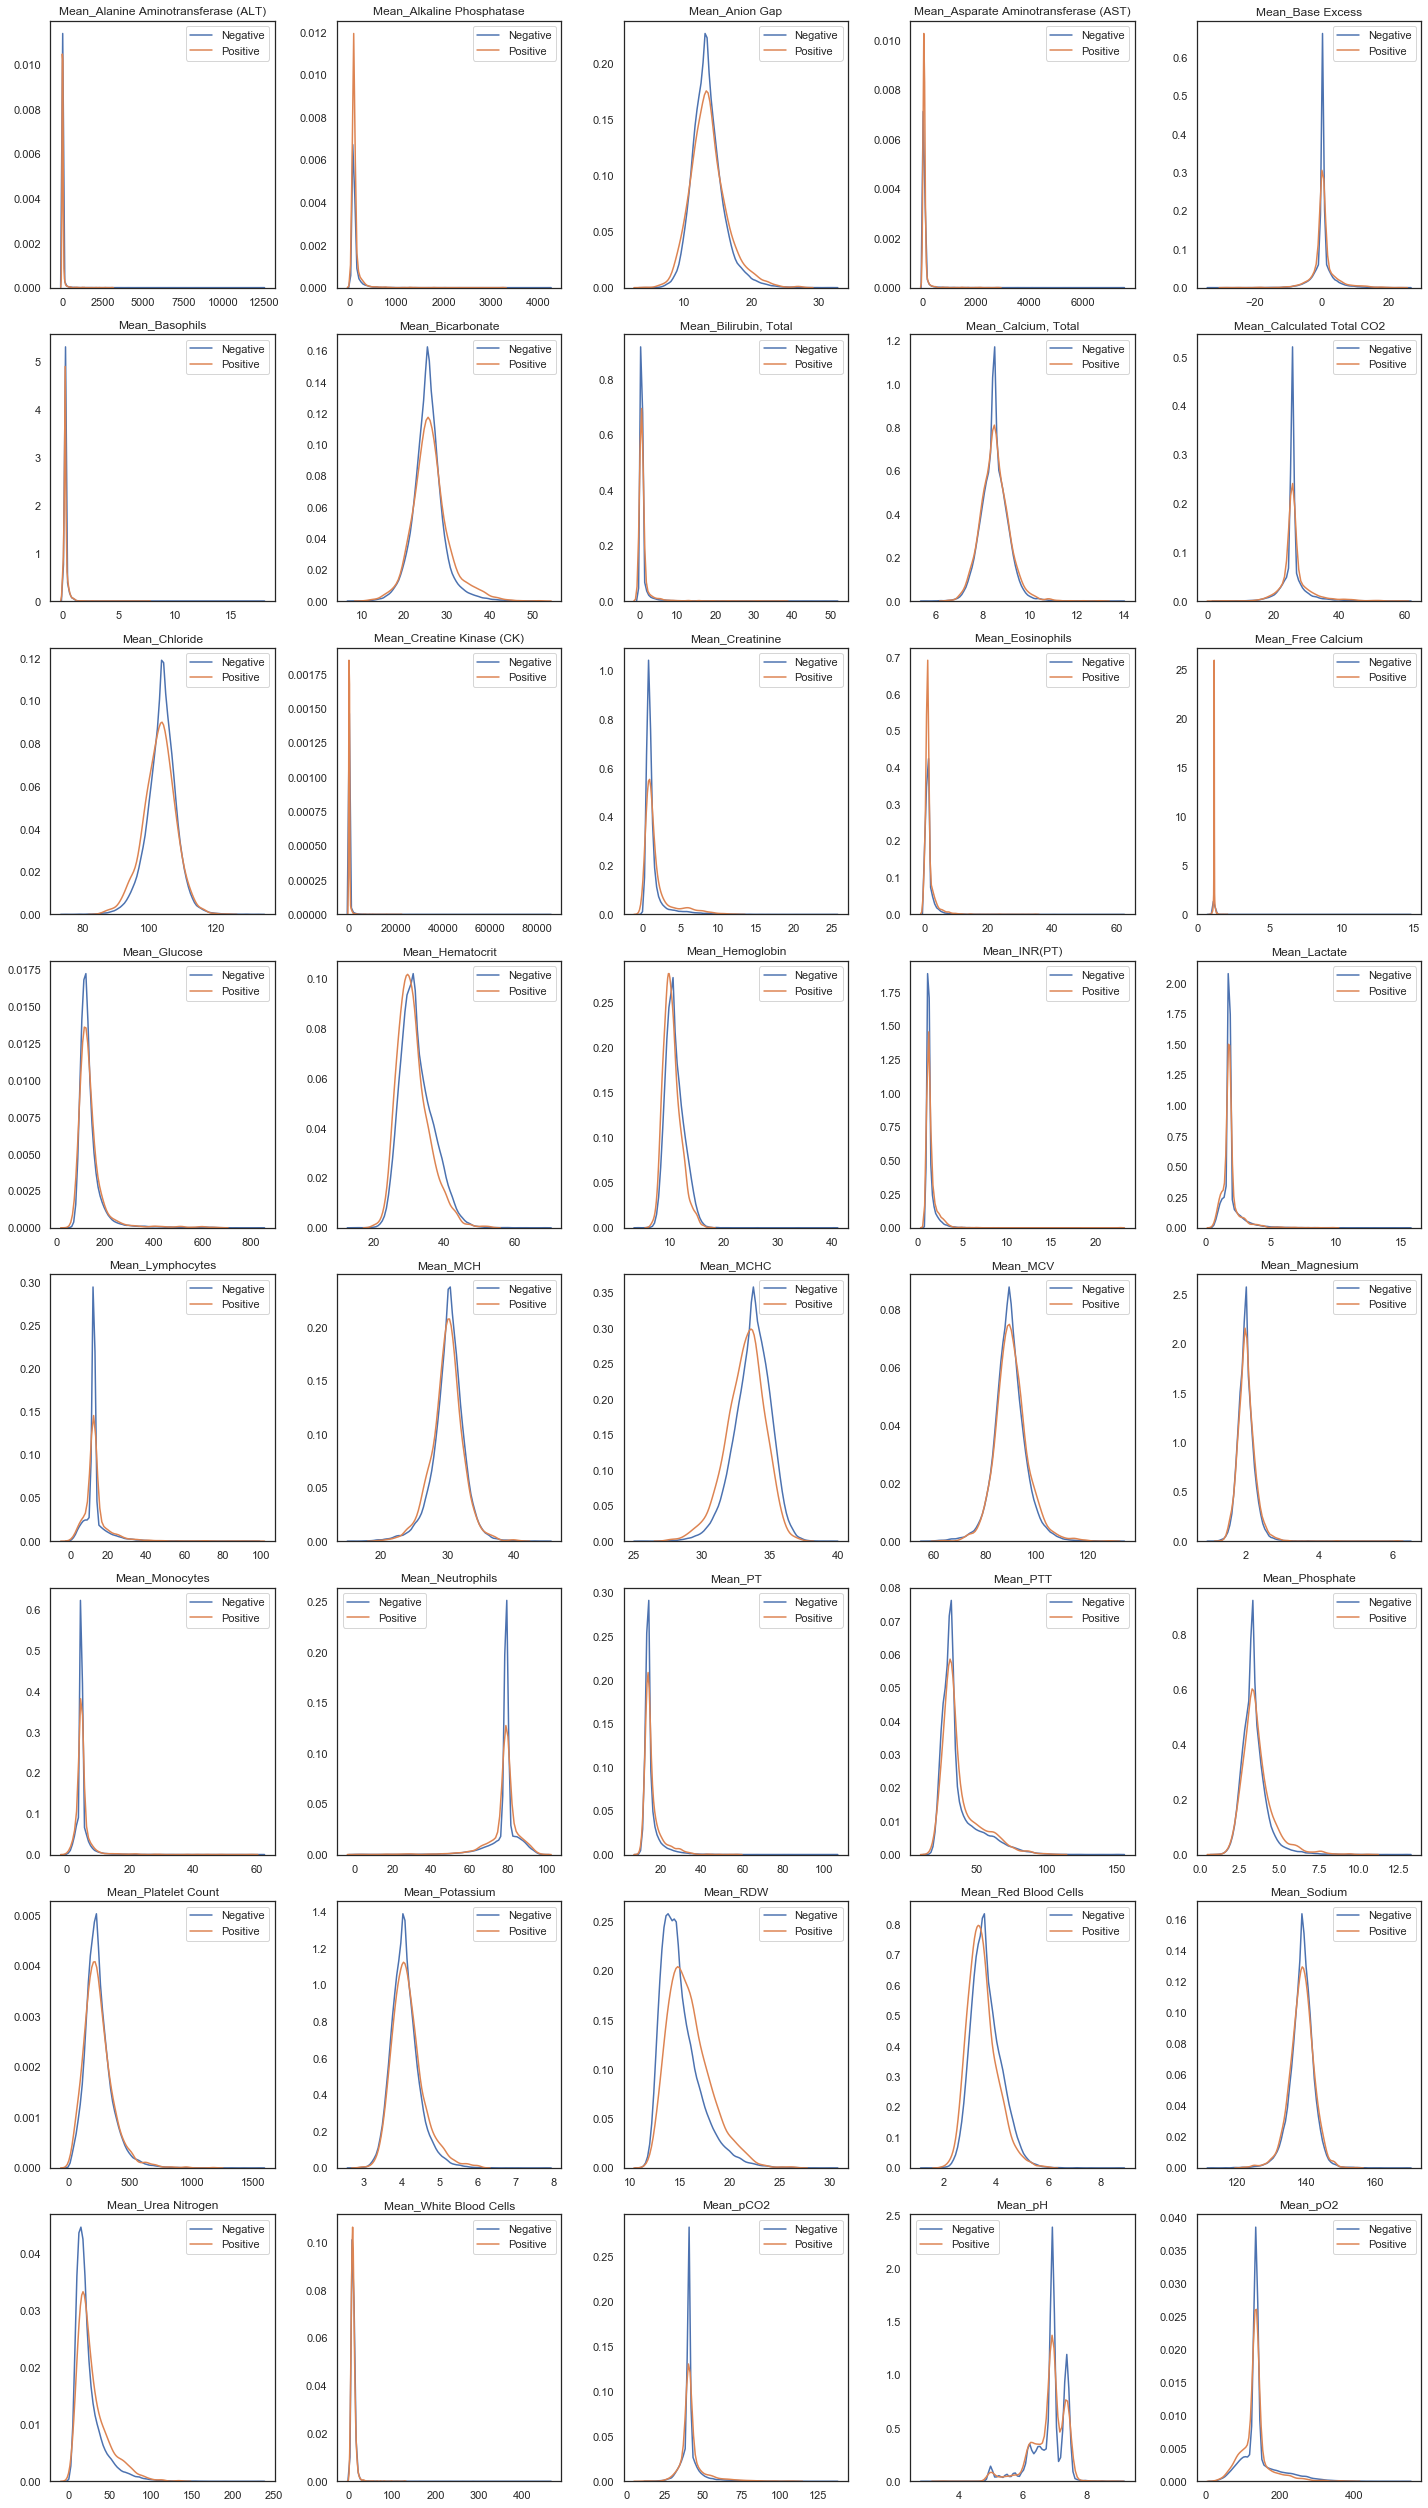

In [465]:
f = plt.figure(figsize=(20,35))
gs = f.add_gridspec(8, 5)

i=0
j=0
for column in mean_cols:
    ax = f.add_subplot(gs[i, j])
    ax = sns.kdeplot(combined_df[combined_df['OUTPUT_LABEL']==0][column], shade=False, label = 'Negative')
    ax = sns.kdeplot(combined_df[combined_df['OUTPUT_LABEL']==1][column], shade=False, label = 'Positive')
    ax.set_title(column)
    j+=1
    if j==5:
        i+=1
        j=0

plt.tight_layout()

In [472]:
# remove all but very representative examples of distribution differences beteween the two groups
cols_to_remove = ['Mean_Chloride', 'Mean_Creatinine',  'Mean_PTT', 'Mean_Potassium']
mean_cols_select_6 = [column for column in mean_cols_select if column not in cols_to_remove]
mean_cols_select_6

['Mean_Hematocrit',
 'Mean_Hemoglobin',
 'Mean_MCHC',
 'Mean_RDW',
 'Mean_Red Blood Cells',
 'Mean_Urea Nitrogen']

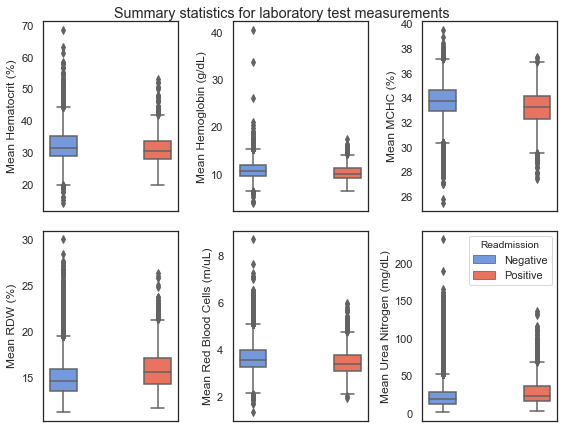

In [574]:
# Create an array with the colors you want to use
colors = ["#6495ed", "#ff6347"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

# having trouble accessing the legend for categories, make a new column with desired legend
combined_df.loc[combined_df['OUTPUT_LABEL'] == 1, 'Readmission'] = 'Positive'
combined_df.loc[combined_df['OUTPUT_LABEL'] == 0, 'Readmission'] = 'Negative'

f = plt.figure(figsize=(8,6))
gs = f.add_gridspec(2, 3)
ax = f.add_subplot(gs[0, 0])
sns.boxplot(x='Readmission', y='Mean_Hematocrit', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Mean Hematocrit (%)')
ax.get_legend().remove()

ax = f.add_subplot(gs[0, 1])
sns.boxplot(x='Readmission', y='Mean_Hemoglobin', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Mean Hemoglobin (g/dL)')
ax.get_legend().remove()

ax = f.add_subplot(gs[0, 2])
sns.boxplot(x='Readmission', y='Mean_MCHC', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Mean MCHC (%)')
ax.get_legend().remove()

ax = f.add_subplot(gs[1, 0])
sns.boxplot(x='Readmission', y='Mean_RDW', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Mean RDW (%)')
ax.get_legend().remove()

ax = f.add_subplot(gs[1, 1])
sns.boxplot(x='Readmission', y='Mean_Red Blood Cells', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Mean Red Blood Cells (m/uL)')
ax.get_legend().remove()

ax = f.add_subplot(gs[1, 2])
sns.boxplot(x='Readmission', y='Mean_Urea Nitrogen', data=combined_df, hue='Readmission')
plt.setp(ax.xaxis.get_label(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Mean Urea Nitrogen (mg/dL)')

plt.suptitle('Summary statistics for laboratory test measurements', y=0.999)

plt.tight_layout()
plt.savefig('../../reports/figures/select_lab_test_sum.png', format='png')

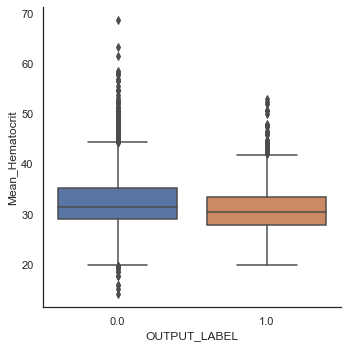

In [523]:
sns.catplot(x="OUTPUT_LABEL", y="Mean_Hematocrit", kind='box', data=combined_df);

In [625]:
combined_df.drop('Readmission', axis=1, inplace=True)
combined_df.to_csv('../../data/intermediate/processed4_feat_select.csv')

In [318]:
var_cols = [column for column in combined_df.columns.tolist() if column.startswith('Var_')]
var_cols

['Var_Alanine Aminotransferase (ALT)',
 'Var_Alkaline Phosphatase',
 'Var_Anion Gap',
 'Var_Asparate Aminotransferase (AST)',
 'Var_Base Excess',
 'Var_Basophils',
 'Var_Bicarbonate',
 'Var_Bilirubin, Total',
 'Var_Calcium, Total',
 'Var_Calculated Total CO2',
 'Var_Chloride',
 'Var_Creatine Kinase (CK)',
 'Var_Creatinine',
 'Var_Eosinophils',
 'Var_Free Calcium',
 'Var_Glucose',
 'Var_Hematocrit',
 'Var_Hemoglobin',
 'Var_INR(PT)',
 'Var_Lactate',
 'Var_Lymphocytes',
 'Var_MCH',
 'Var_MCHC',
 'Var_MCV',
 'Var_Magnesium',
 'Var_Monocytes',
 'Var_Neutrophils',
 'Var_PT',
 'Var_PTT',
 'Var_Phosphate',
 'Var_Platelet Count',
 'Var_Potassium',
 'Var_RDW',
 'Var_Red Blood Cells',
 'Var_Sodium',
 'Var_Specific Gravity',
 'Var_Urea Nitrogen',
 'Var_White Blood Cells',
 'Var_pCO2',
 'Var_pH',
 'Var_pO2']

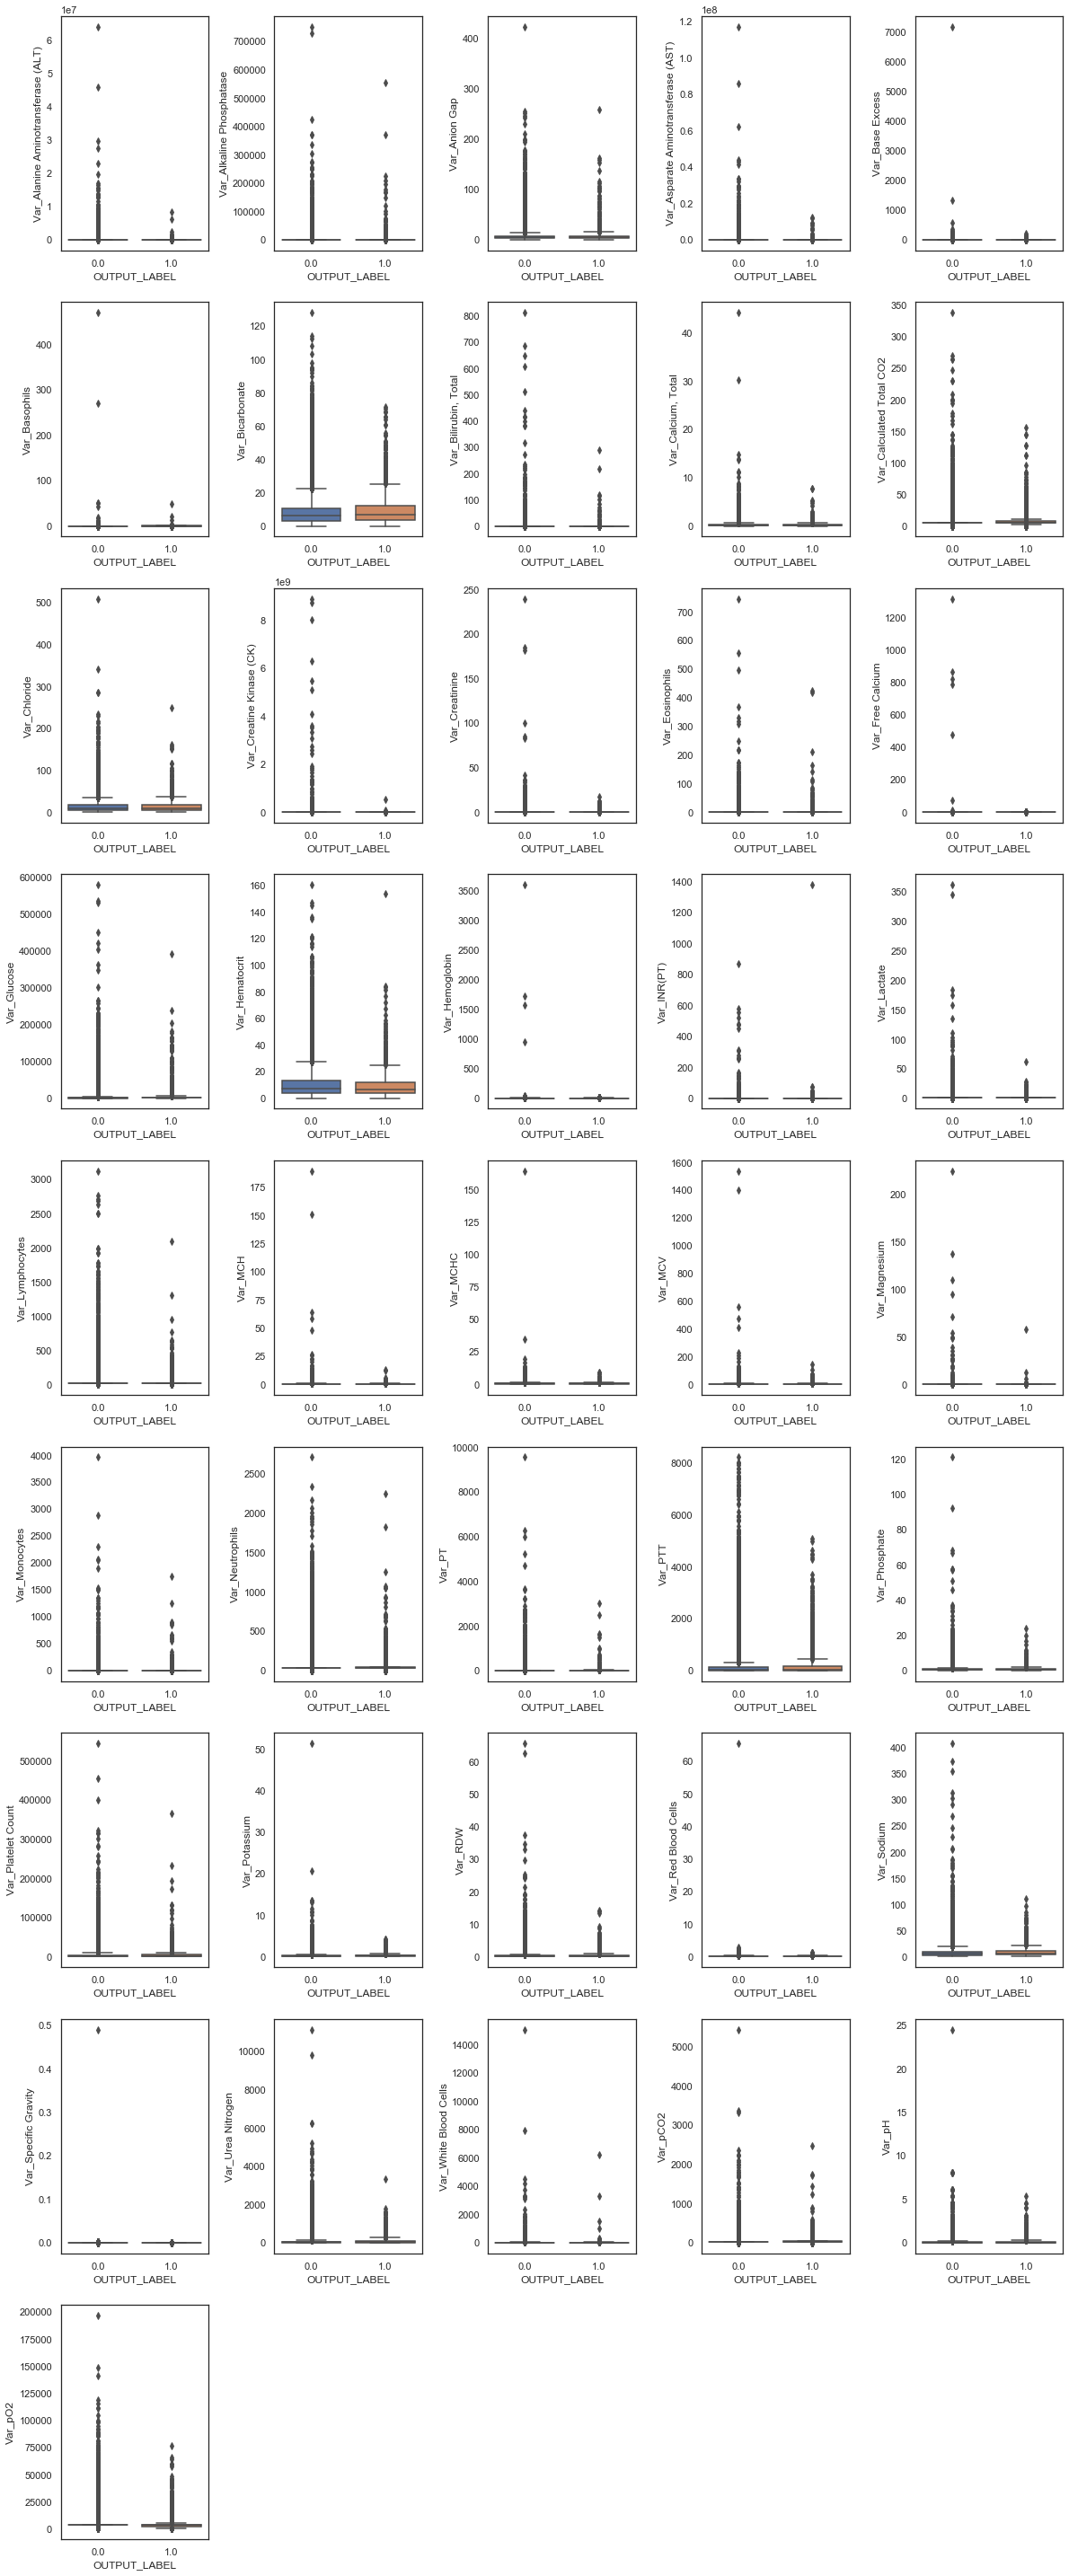

In [362]:
f = plt.figure(figsize=(20,40))
gs = f.add_gridspec(9, 6)

i=0
j=0
for column in var_cols:
    ax = f.add_subplot(gs[i, j])
    ax = sns.boxplot(x="OUTPUT_LABEL", y=column, data=combined_df)
    j+=1
    if j==5:
        i+=1
        j=0

plt.tight_layout()

In [369]:
combined_df.columns.tolist().index('Var_pO2')

206

In [370]:
len(combined_df.columns.tolist())

386

In [371]:
386-206

180

In [372]:
# the remaining 180 columns are diagnosis features
combined_df.columns.tolist()[207:220]

['DESCRIPTION',
 'DRG_SEVERITY',
 'DRG_MORTALITY',
 'abdomin',
 'abus',
 'acut',
 'age',
 'agent',
 'alcohol',
 'aliv',
 'ami',
 'arrhythmia',
 'arteri']

In [373]:
# Description is the concatenated test, since we already encoded it drop the column
combined_df.drop('DESCRIPTION', axis=1, inplace=True)

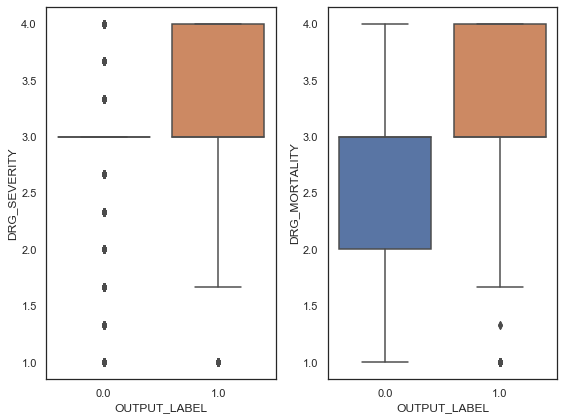

In [381]:
f = plt.figure(figsize=(8,6))
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax = sns.boxplot(x="OUTPUT_LABEL", y='DRG_SEVERITY', data=combined_df)
ax = f.add_subplot(gs[0, 1])
ax = sns.boxplot(x="OUTPUT_LABEL", y='DRG_MORTALITY', data=combined_df)
plt.tight_layout()

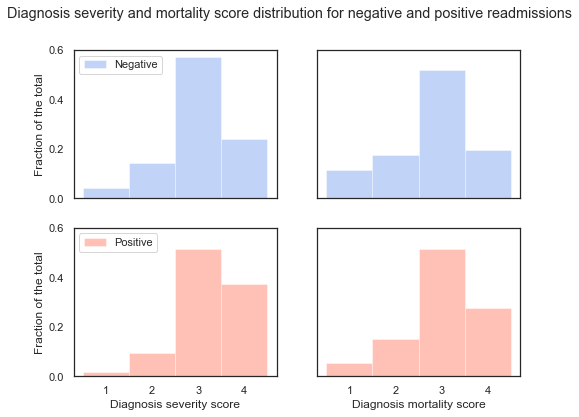

In [575]:
f = plt.figure(figsize=(8,6))
gs = f.add_gridspec(2, 2)
ax1 = f.add_subplot(gs[0, 0], sharex=ax3)
ax1 = sns.distplot(combined_df[combined_df['OUTPUT_LABEL']==0]['DRG_SEVERITY'], bins=(np.arange(1,6) - 0.5), \
                   kde=False, norm_hist=True, label='Not readmitted', color='cornflowerblue')
ax1.set_ylabel('Fraction of the total')
ax1.set_ylim(0,0.6)
ax1.set_yticks([0, 0.2, 0.4, 0.6])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.xaxis.get_label(), visible=False)
plt.legend(labels=['Negative'], loc='upper left')
ax2 = f.add_subplot(gs[0, 1], sharey=ax1, sharex=ax4)
ax2 = sns.distplot(combined_df[combined_df['OUTPUT_LABEL']==0]['DRG_MORTALITY'], bins=(np.arange(1,6) - 0.5), \
                   kde=False, norm_hist=True, color='cornflowerblue')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.xaxis.get_label(), visible=False)
ax2.set_ylim(0,0.6)

ax3 = f.add_subplot(gs[1, 0])
ax3 = sns.distplot(combined_df[combined_df['OUTPUT_LABEL']==1]['DRG_SEVERITY'], bins=(np.arange(1,6) - 0.5), \
                   kde=False, color='tomato', norm_hist=True, axlabel='Diagnosis severity score', label='Readmitted')
ax3.set_ylabel('Fraction of the total')
ax3.set_xticks([1, 2, 3, 4])
ax3.set_ylim(0,0.6)
ax3.set_yticks([0, 0.2, 0.4, 0.6])
plt.legend(labels=['Positive'], loc='upper left')

ax4 = f.add_subplot(gs[1, 1], sharey=ax3)
ax4 = sns.distplot(combined_df[combined_df['OUTPUT_LABEL']==1]['DRG_MORTALITY'], bins=(np.arange(1,6) - 0.5), \
                   kde=False, color='tomato', axlabel='Diagnosis mortality score', norm_hist=True)
plt.setp(ax4.get_yticklabels(), visible=False)
ax4.set_xticks([1, 2, 3, 4])
ax4.set_ylim(0,0.6)

plt.suptitle('Diagnosis severity and mortality score distribution for negative and positive readmissions')
plt.savefig('../../reports/figures/diag_sev_mort_score.png', format='png')

In [421]:
sev_scores_0 = combined_df[combined_df['OUTPUT_LABEL']==1]['DRG_SEVERITY'].values
print(mean(sev_scores_0))

NameError: name 'mean' is not defined

In [433]:
xlbl.label()

AttributeError: 'silent_list' object has no attribute 'label'